<h1><center> Credit Risk Modeling </center></h1>

<hr>


* [1. Dataset description](#description)
* [2. The needed steps](#needs)
    * [2.1. Import Libraries](#import)
    * [2.2. Import Dataset](#import2)
* [3. Data Understanding](#understand) 
* [4. Data Preparation and Data Analysis](#preparation) 
    * [4.1. Missing Values](#missing_values)
    * [4.2. Data Distribution](#distribution)     
    * [4.3. Outliers](#outliers)
    * [4.4. Other Analysis](#other)     
    * [4.5. Data Cleaning](#cleaning)     
    * [4.6. Feature Engineering](#feature)
* [5. Feature Selection](#feature) 
* [6. Models](#model) 
    * [6.1. Dataset splitting](#splitting)
    * [6.2. Logistic Regression](#lg)
    * [6.3. Decision Tree](#dt)
    * [6.4. Random Forest](#rf)
    * [6.5. Neural networks](#nn)
* [7. Final Results](#results) 

<hr>
<a id="description">
    
# 1. Dataset description
    
</a>
<br>


- **Id :**A unique LC assigned ID for the loan listing. 
- **loan_amnt :**The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value. 
- **funded_amnt :**The total amount committed to that loan at that point in time. 
- **funded_amnt_inv :**The total amount committed by investors for that loan at that point in time. 
- **term :**The number of payments on the loan. Values are in months and can be either 36 or 60. 
- **int_rate :**Interest Rate on the loan.
- **installment :**The monthly payment owed by the borrower if the loan originates. 
- **grade :**LC assigned loan grade.
- **emp_title :**The job title supplied by the Borrower when applying for the loan.* 
- **emp_length :**Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.  
- **home_ownership :**The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER. 
- **annual_inc :**The self-reported annual income provided by the borrower during registration. 
- **verification_status :**Indicates if income was verified by LC, not verified, or if the income source was verified.
- **issue_d :**The month which the loan was funded.
- **loan_status :**Current status of the loan. 
- **purpose :**A category provided by the borrower for the loan request.  
- **addr_state :**The state provided by the borrower in the loan application.
- **dti :**A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s selfreported monthly income.
- **delinq_2yrs :**The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.
- **earliest_cr_line :**The month the borrower's earliest reported credit line was opened.
- **inq_last_6mths :**The number of inquiries in past 6 months (excluding auto and mortgage inquiries).
- **open_acc :**The number of open credit lines in the borrower's credit file.
- **pub_rec :**Number of derogatory public records.
- **revol_bal :**Total credit revolving balance.
- **revol_util :**Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
- **total_acc :**The total number of credit lines currently in the borrower's credit file.
- **out_prncp :**The remaining outstanding principal for the total amount funded.
- **total_pymnt :**Payments received to date for total amount funded.

<hr>
<a id="needs">
    
# 2. The needed steps
    
</a>

<a  id="import">

## 2.1. Import Libraries

</a>




In [1]:
import warnings
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import scikitplot as skplt
from scipy.stats import norm
from datetime import datetime
import requests, zipfile, io
from collections import Counter
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from datetime import datetime as dt
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix, classification_report

<a id="import2">

## 2.2. Import Dataset
</a>

In [2]:
df = pd.read_csv("dataset.csv", sep=',', encoding= 'utf8')

<hr>
<a class="anchor" id="understand">
    
# 3. Data Understanding
    
</a>

In [3]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,...,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt
0,1,2500,2500,2500.0,36 months,13.56,84.92,C,Chef,10+ years,...,0,Apr-01,1.0,9,1,4341,10.3,34,2386.02,167.02
1,2,30000,30000,30000.0,60 months,18.94,777.23,D,Postmaster,10+ years,...,0,Jun-87,0.0,13,1,12315,24.2,44,29387.75,1507.11
2,3,5000,5000,5000.0,36 months,17.97,180.69,D,Administrative,6 years,...,0,Apr-11,0.0,8,0,4599,19.1,13,4787.21,353.89
3,4,4000,4000,4000.0,36 months,18.94,146.51,D,IT Supervisor,10+ years,...,0,Feb-06,0.0,10,0,5468,78.1,13,3831.93,286.71
4,5,30000,30000,30000.0,60 months,16.14,731.78,C,Mechanic,10+ years,...,0,Dec-00,0.0,12,0,829,3.6,26,29339.02,1423.21


The columns are:

In [4]:
for n in df.columns: print(n)

id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
purpose
addr_state
dti
delinq_2yrs
earliest_cr_line
inq_last_6mths
open_acc
pub_rec
revol_bal
revol_util
total_acc
out_prncp
total_pymnt


In [5]:
df.shape

(1048575, 28)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 28 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   id                   1048575 non-null  int64  
 1   loan_amnt            1048575 non-null  int64  
 2   funded_amnt          1048575 non-null  int64  
 3   funded_amnt_inv      1048575 non-null  float64
 4   term                 1048575 non-null  object 
 5   int_rate             1048575 non-null  float64
 6   installment          1048575 non-null  float64
 7   grade                1048575 non-null  object 
 8   emp_title            958131 non-null   object 
 9   emp_length           971110 non-null   object 
 10  home_ownership       1048575 non-null  object 
 11  annual_inc           1048575 non-null  float64
 12  verification_status  1048575 non-null  object 
 13  issue_d              1048575 non-null  object 
 14  loan_status          1048575 non-null  object 
 15

In [7]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt
count,1048575.00000,1048575.00000,1048575.00000,1048575.00000,1048575.00000,1048575.00000,1048575.00000,1047378.00000,1048575.00000,1048574.00000,1048575.00000,1048575.00000,1048575.00000,1047674.00000,1048575.00000,1048575.00000,1048575.00000
mean,524288.00000,15384.87366,15384.84696,15379.75333,12.80290,453.82491,79674.60675,19.28933,0.29745,0.50780,11.70544,0.19628,16724.84256,47.68890,23.71599,6812.75526,9541.06454
std,302697.67359,9533.83780,9533.83968,9532.47312,4.96278,276.20689,84101.83252,15.89602,0.85794,0.80398,5.84629,0.56690,23441.69725,24.79403,12.11728,8946.78812,9234.61213
min,1.00000,1000.00000,1000.00000,725.00000,5.31000,14.77000,0.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.00000,0.00000,0.00000
25%,262144.50000,8000.00000,8000.00000,8000.00000,9.16000,251.65000,47000.00000,11.93000,0.00000,0.00000,8.00000,0.00000,5722.00000,28.50000,15.00000,0.00000,2603.66000
50%,524288.00000,13000.00000,13000.00000,13000.00000,11.99000,380.66000,66000.00000,18.05000,0.00000,0.00000,11.00000,0.00000,11107.00000,46.90000,22.00000,2543.44000,6338.31000
75%,786431.50000,20000.00000,20000.00000,20000.00000,15.49000,609.44000,95000.00000,25.02000,0.00000,1.00000,15.00000,0.00000,20122.00000,66.40000,30.00000,11011.88500,13426.24561
max,1048575.00000,40000.00000,40000.00000,40000.00000,30.99000,1670.15000,9930475.00000,999.00000,58.00000,5.00000,101.00000,86.00000,2358150.00000,191.00000,176.00000,40000.00000,59808.26209


Define Numerical and Categorical variables:

In [8]:
numerical_variables = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'total_pymnt']
categorical_variables = ['term', 'grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state']

<hr>
<a class="anchor" id="preparation">
    
# 4. Data Preparation and Data Analysis
    
</a>

<a  id="#missing_values">

## 4.1. Missing Values

</a>


**- Checking percentage of missing values per variable:**

In [9]:
# Total missing values
mis_val = df.isnull().sum()
# Percentage of missing values
mis_val_percent = 100 * df.isnull().sum() / len(df)
mis_val_type = df.dtypes
# Make a table with the results
mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_type], axis=1)

# Rename the columns
mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'type'})

# Sort the table by percentage of missing descending
mis_val_table_ren_columns = mis_val_table_ren_columns[ mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)

# Print some summary information
print ("The dataframe has " + str(df.shape[1]) + " columns.\n" "There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")

# Return the dataframe with missing information
mis_val_table_ren_columns

The dataframe has 28 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values,type
emp_title,90444,8.6,object
emp_length,77465,7.4,object
dti,1197,0.1,float64
revol_util,901,0.1,float64
inq_last_6mths,1,0.0,float64


<a  id="#distribution">

## 4.2. Data Distribution

</a>


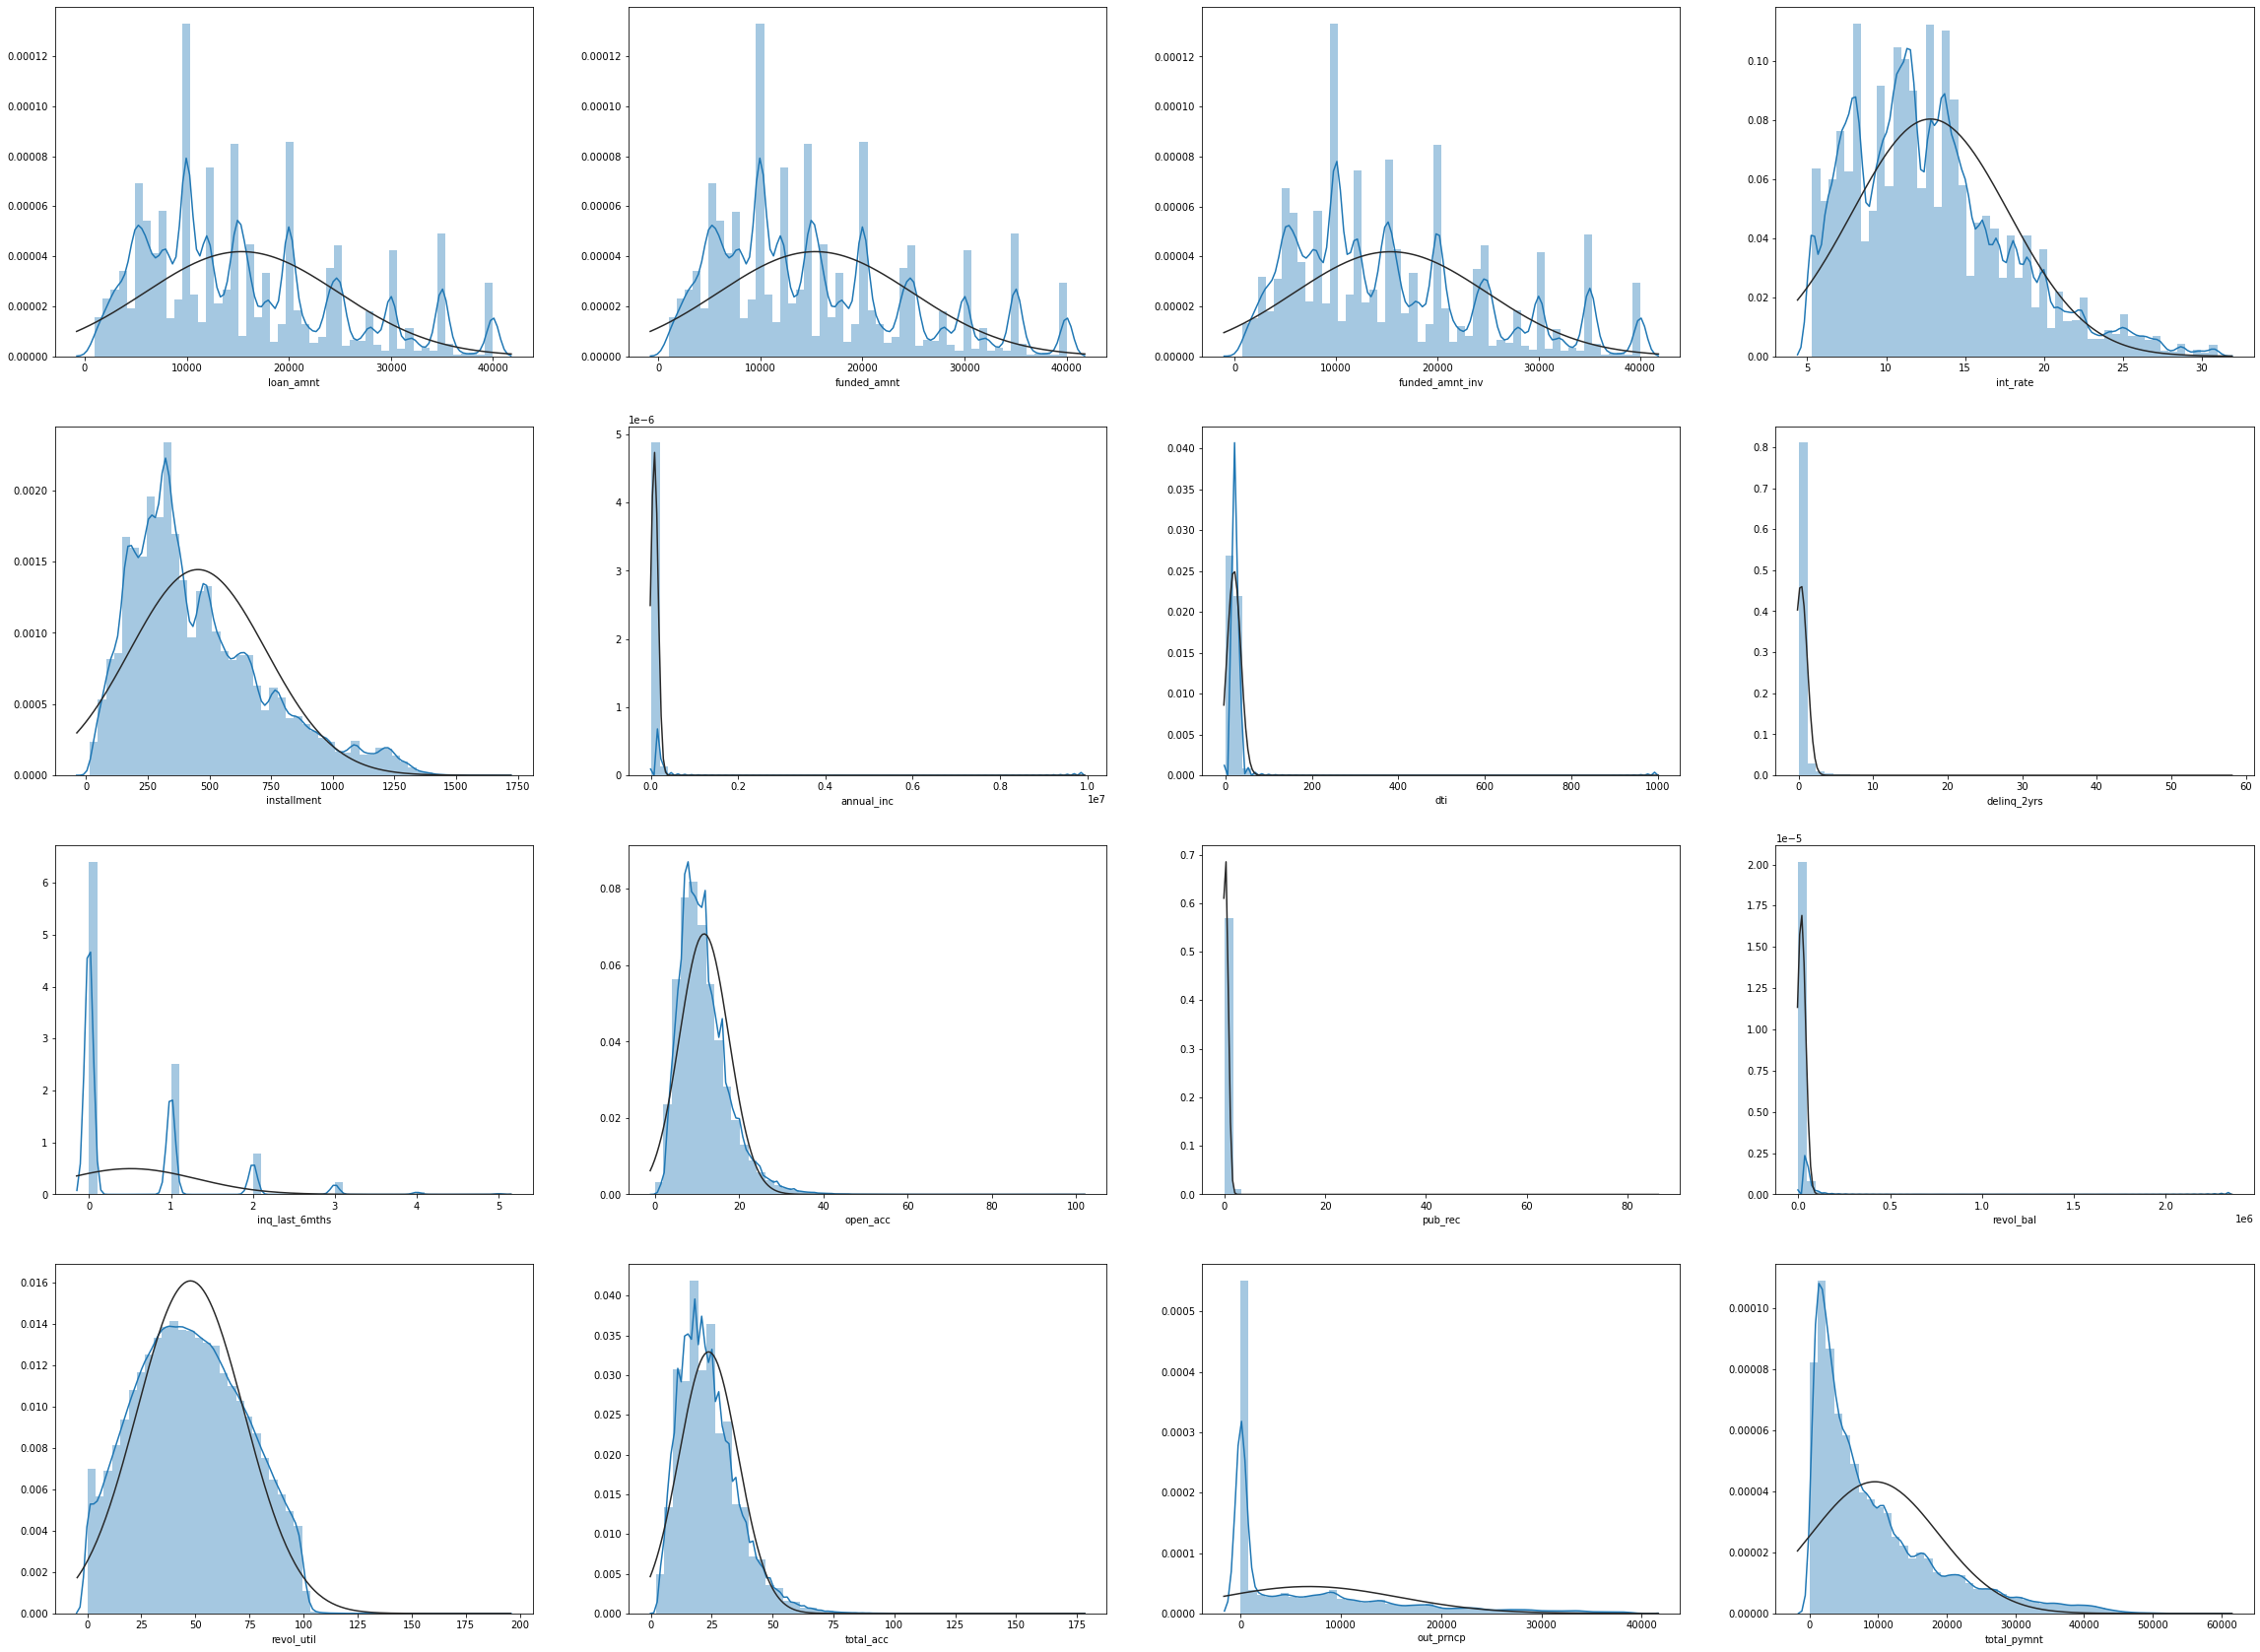

In [10]:
fig, ax = plt.subplots(4, 4, figsize=(40, 30))
for var, subplot in zip(df[numerical_variables], ax.flatten()):
    sns.distplot(df[var], ax=subplot, fit=norm)
#plt.savefig('distribution.png')

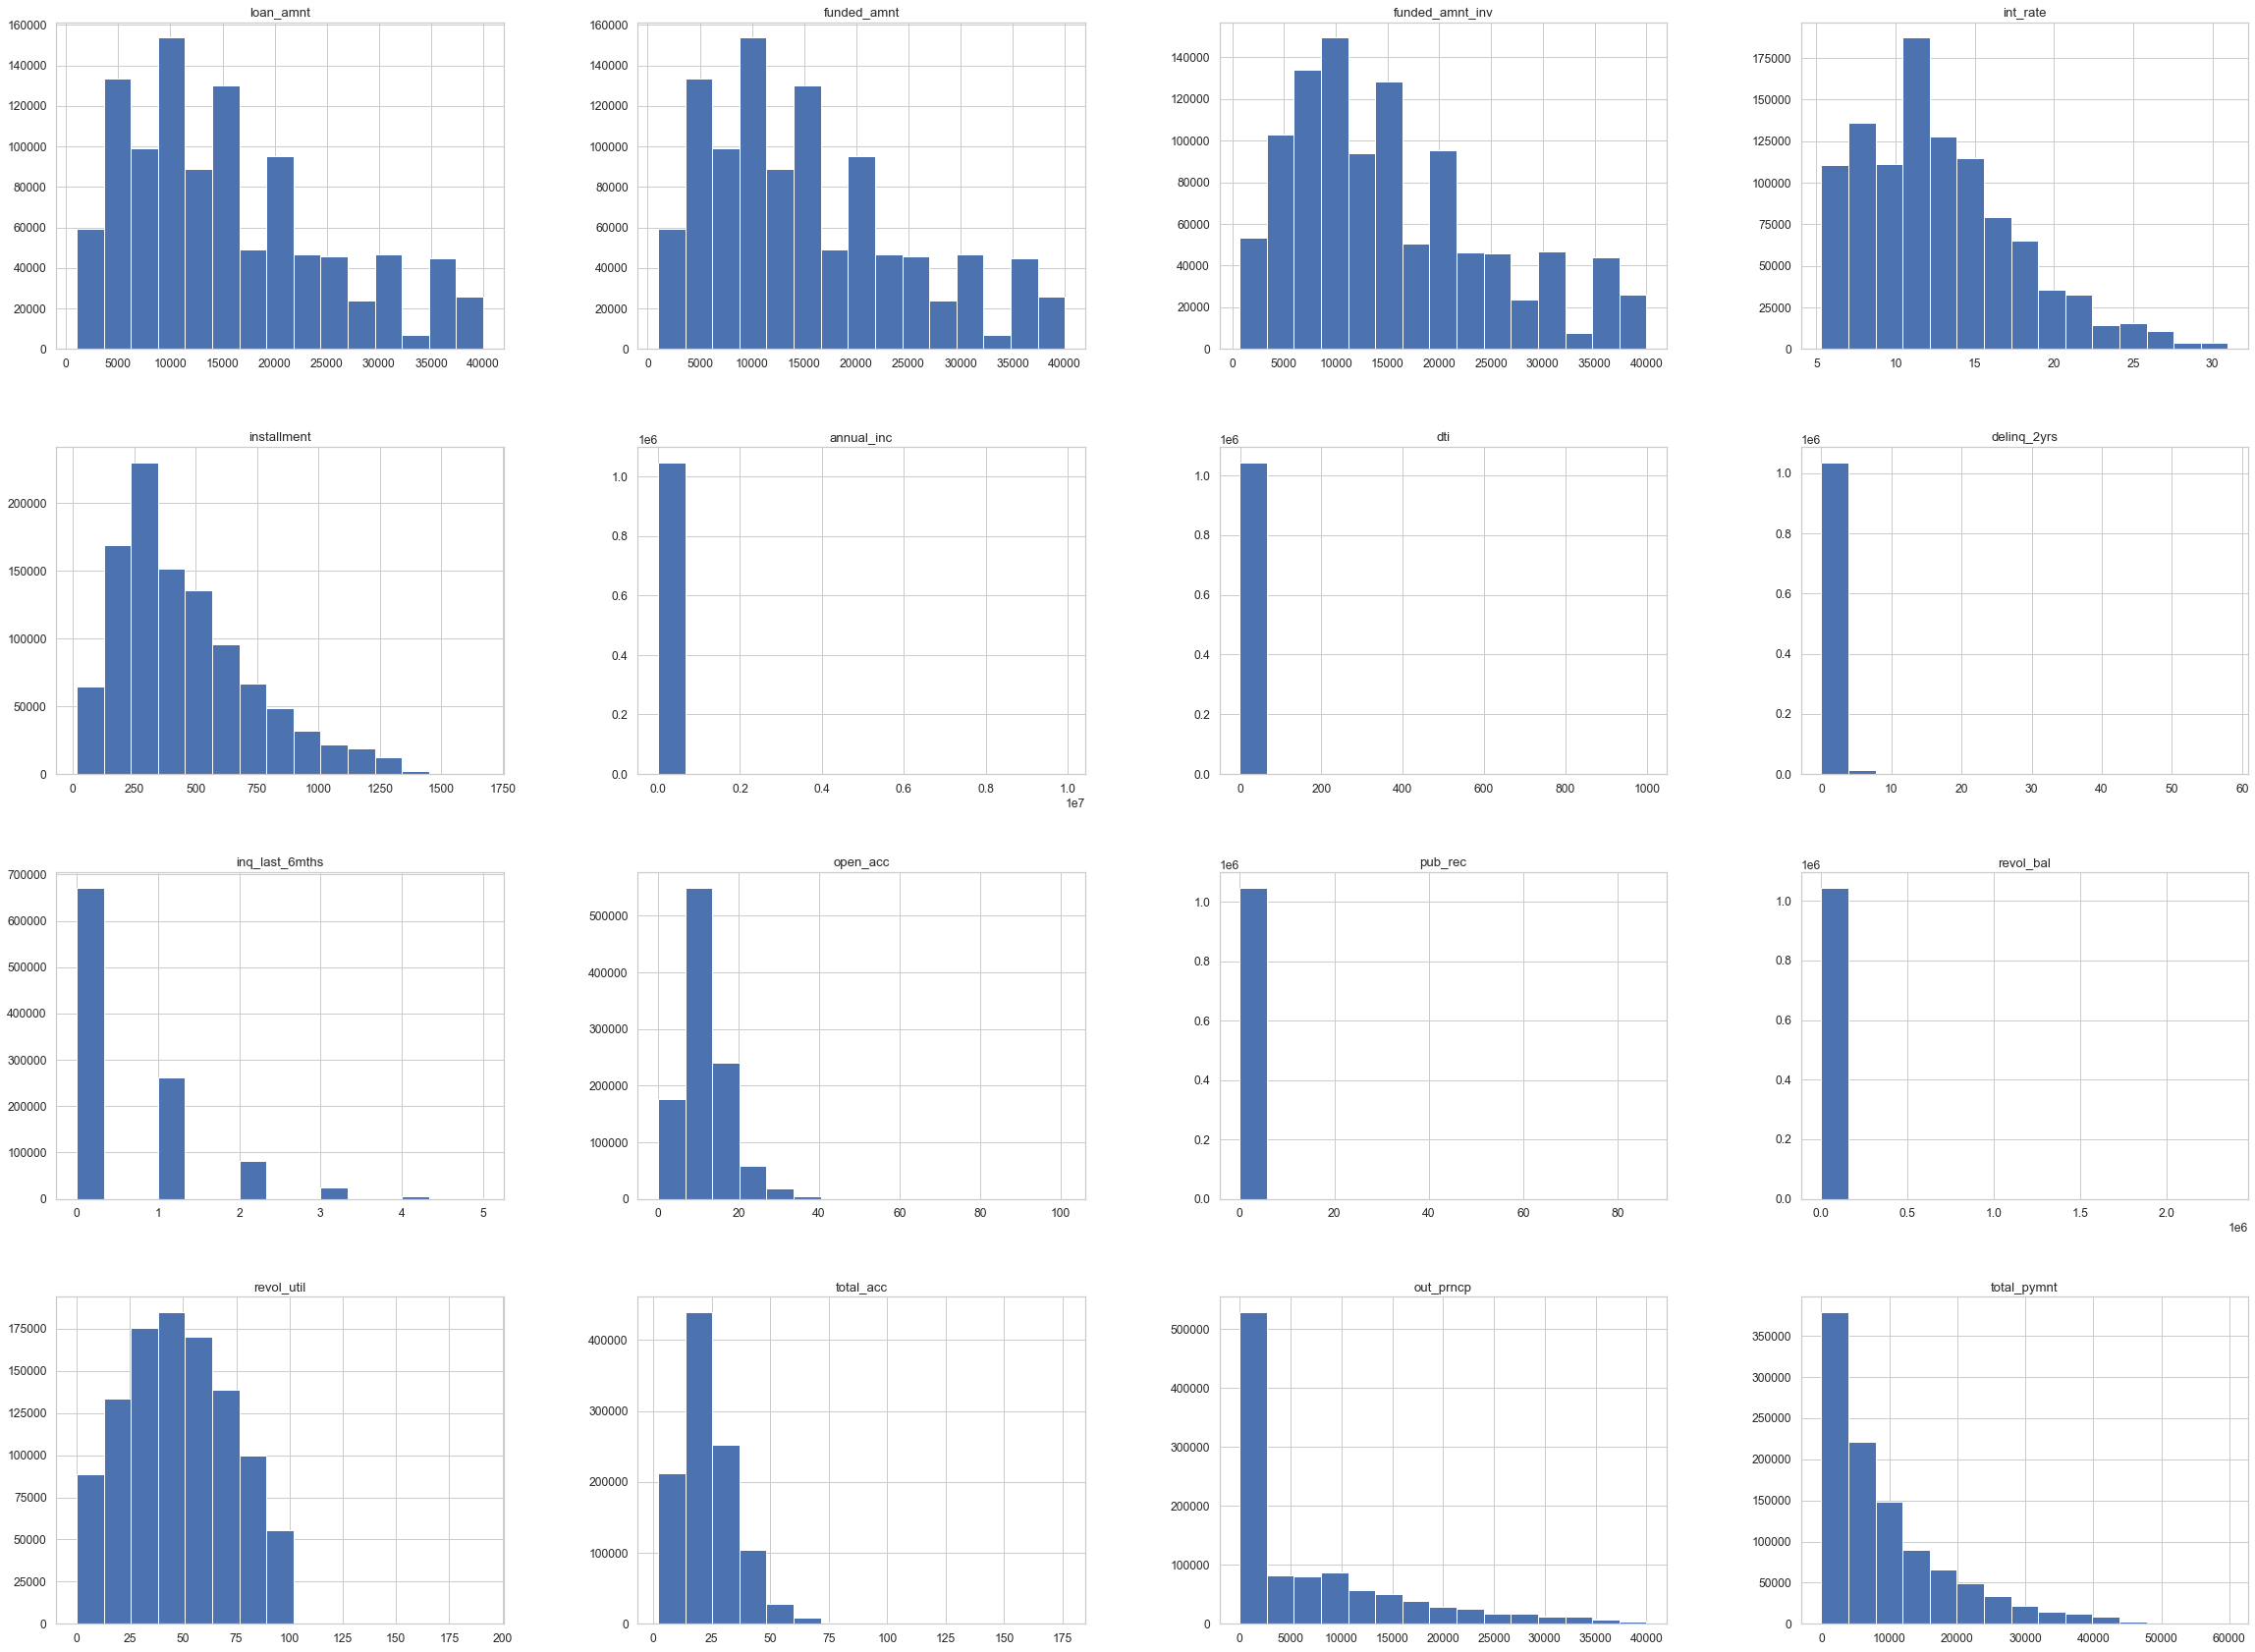

In [11]:
# Define the variables we want to see the distribution off
variables = df[numerical_variables]

# Plot
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
variables.hist(bins=15, figsize=(40, 30), layout=(4, 4));
#plt.savefig('distribution2.png')

<a  id="outliers">

## 4.3. Outliers

</a>


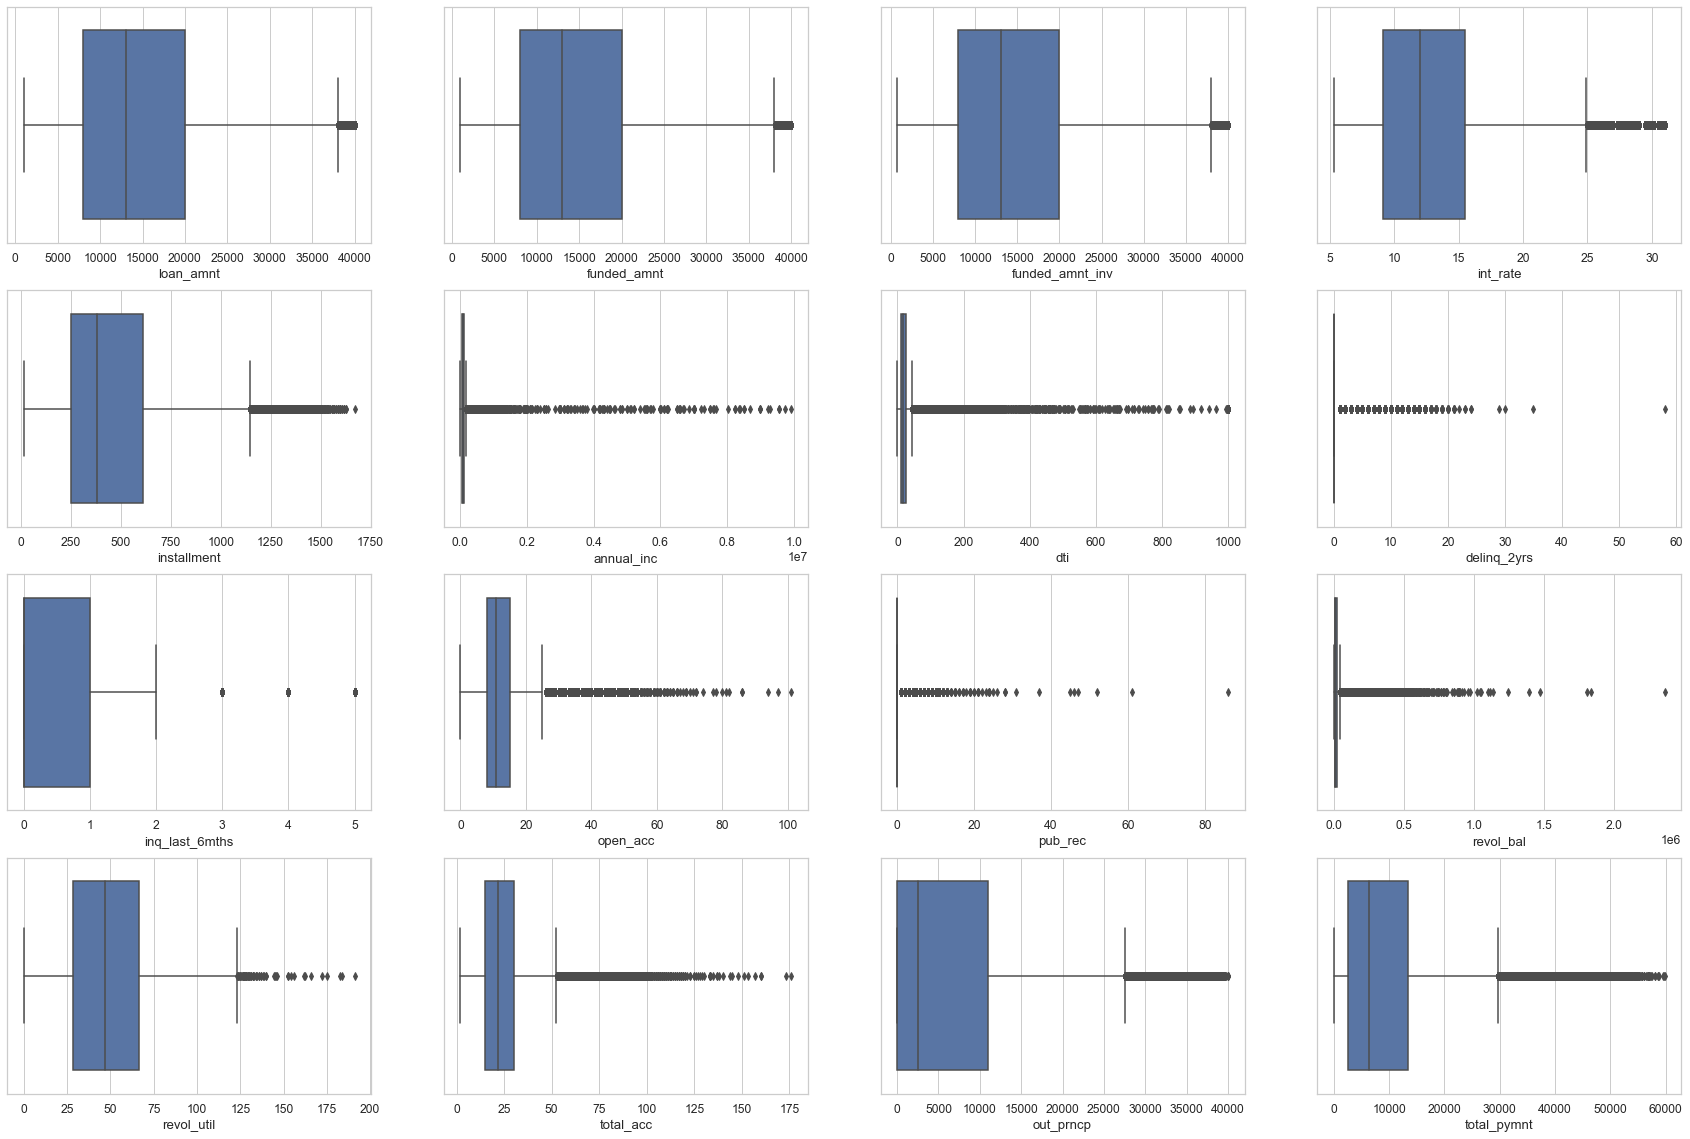

In [12]:
# Plot the boxplots for the columns previously defined 
fig, ax = plt.subplots(4, 4, figsize=(30,20))
for var, subplot in zip(df[numerical_variables], ax.flatten()):
    sns.boxplot(df[var], ax=subplot)
    
#plt.savefig('outliers.png')

<a  id="#other">

## 4.4. Other analysis

</a>


### 4.4.1 Target Variable

Check distirbution of the Loan Status Variable:

In [13]:
loans_status = pd.DataFrame(df.groupby(['loan_status'])['id'].count())
loans_status.sort_values(by=['id'], ascending=False)

,id
loan_status,
Current,603273
Fully Paid,331528
Charged Off,94286
Late (31-120 days),12154
In Grace Period,5151
Late (16-30 days),2162
Default,21


Text(0.5, 1.0, 'Number of loans by Loan Status')

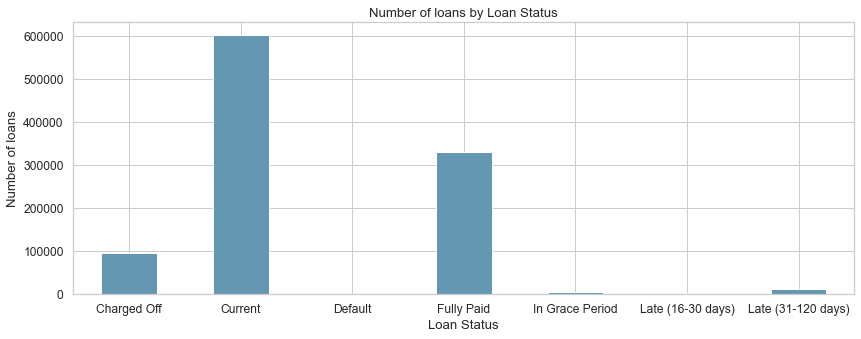

In [14]:
colors = ["#6497b1", "#006e96", "#033f6c", '#63ace5']
loans_status.plot(kind="bar", figsize=(14,5), color=colors, legend=None)
plt.xlabel('Loan Status')
plt.xticks(rotation=0)
plt.ylabel('Number of loans')
plt.title('Number of loans by Loan Status')
#plt.savefig('loan_status.png')

Once we need to have just two different categories for the target value, we will consider as 'Default' loan the categories equal to Charged off, Late (31-120 days) and Default and as 'Non Default' loan the categories equal to Fully Paid.

In [15]:
default=['Charged Off','Late (31-120 days)','Default', 'In Grace Period', 'Late (16-30 days)']
df['Default Loan']=df['loan_status'].apply(lambda x: 'Default' if x in default else 'Non Default')
df['Default Loan'].value_counts()

Non Default    934801
Default        113774
Name: Default Loan, dtype: int64

#### Distribution of numerical variables per Deafult Status

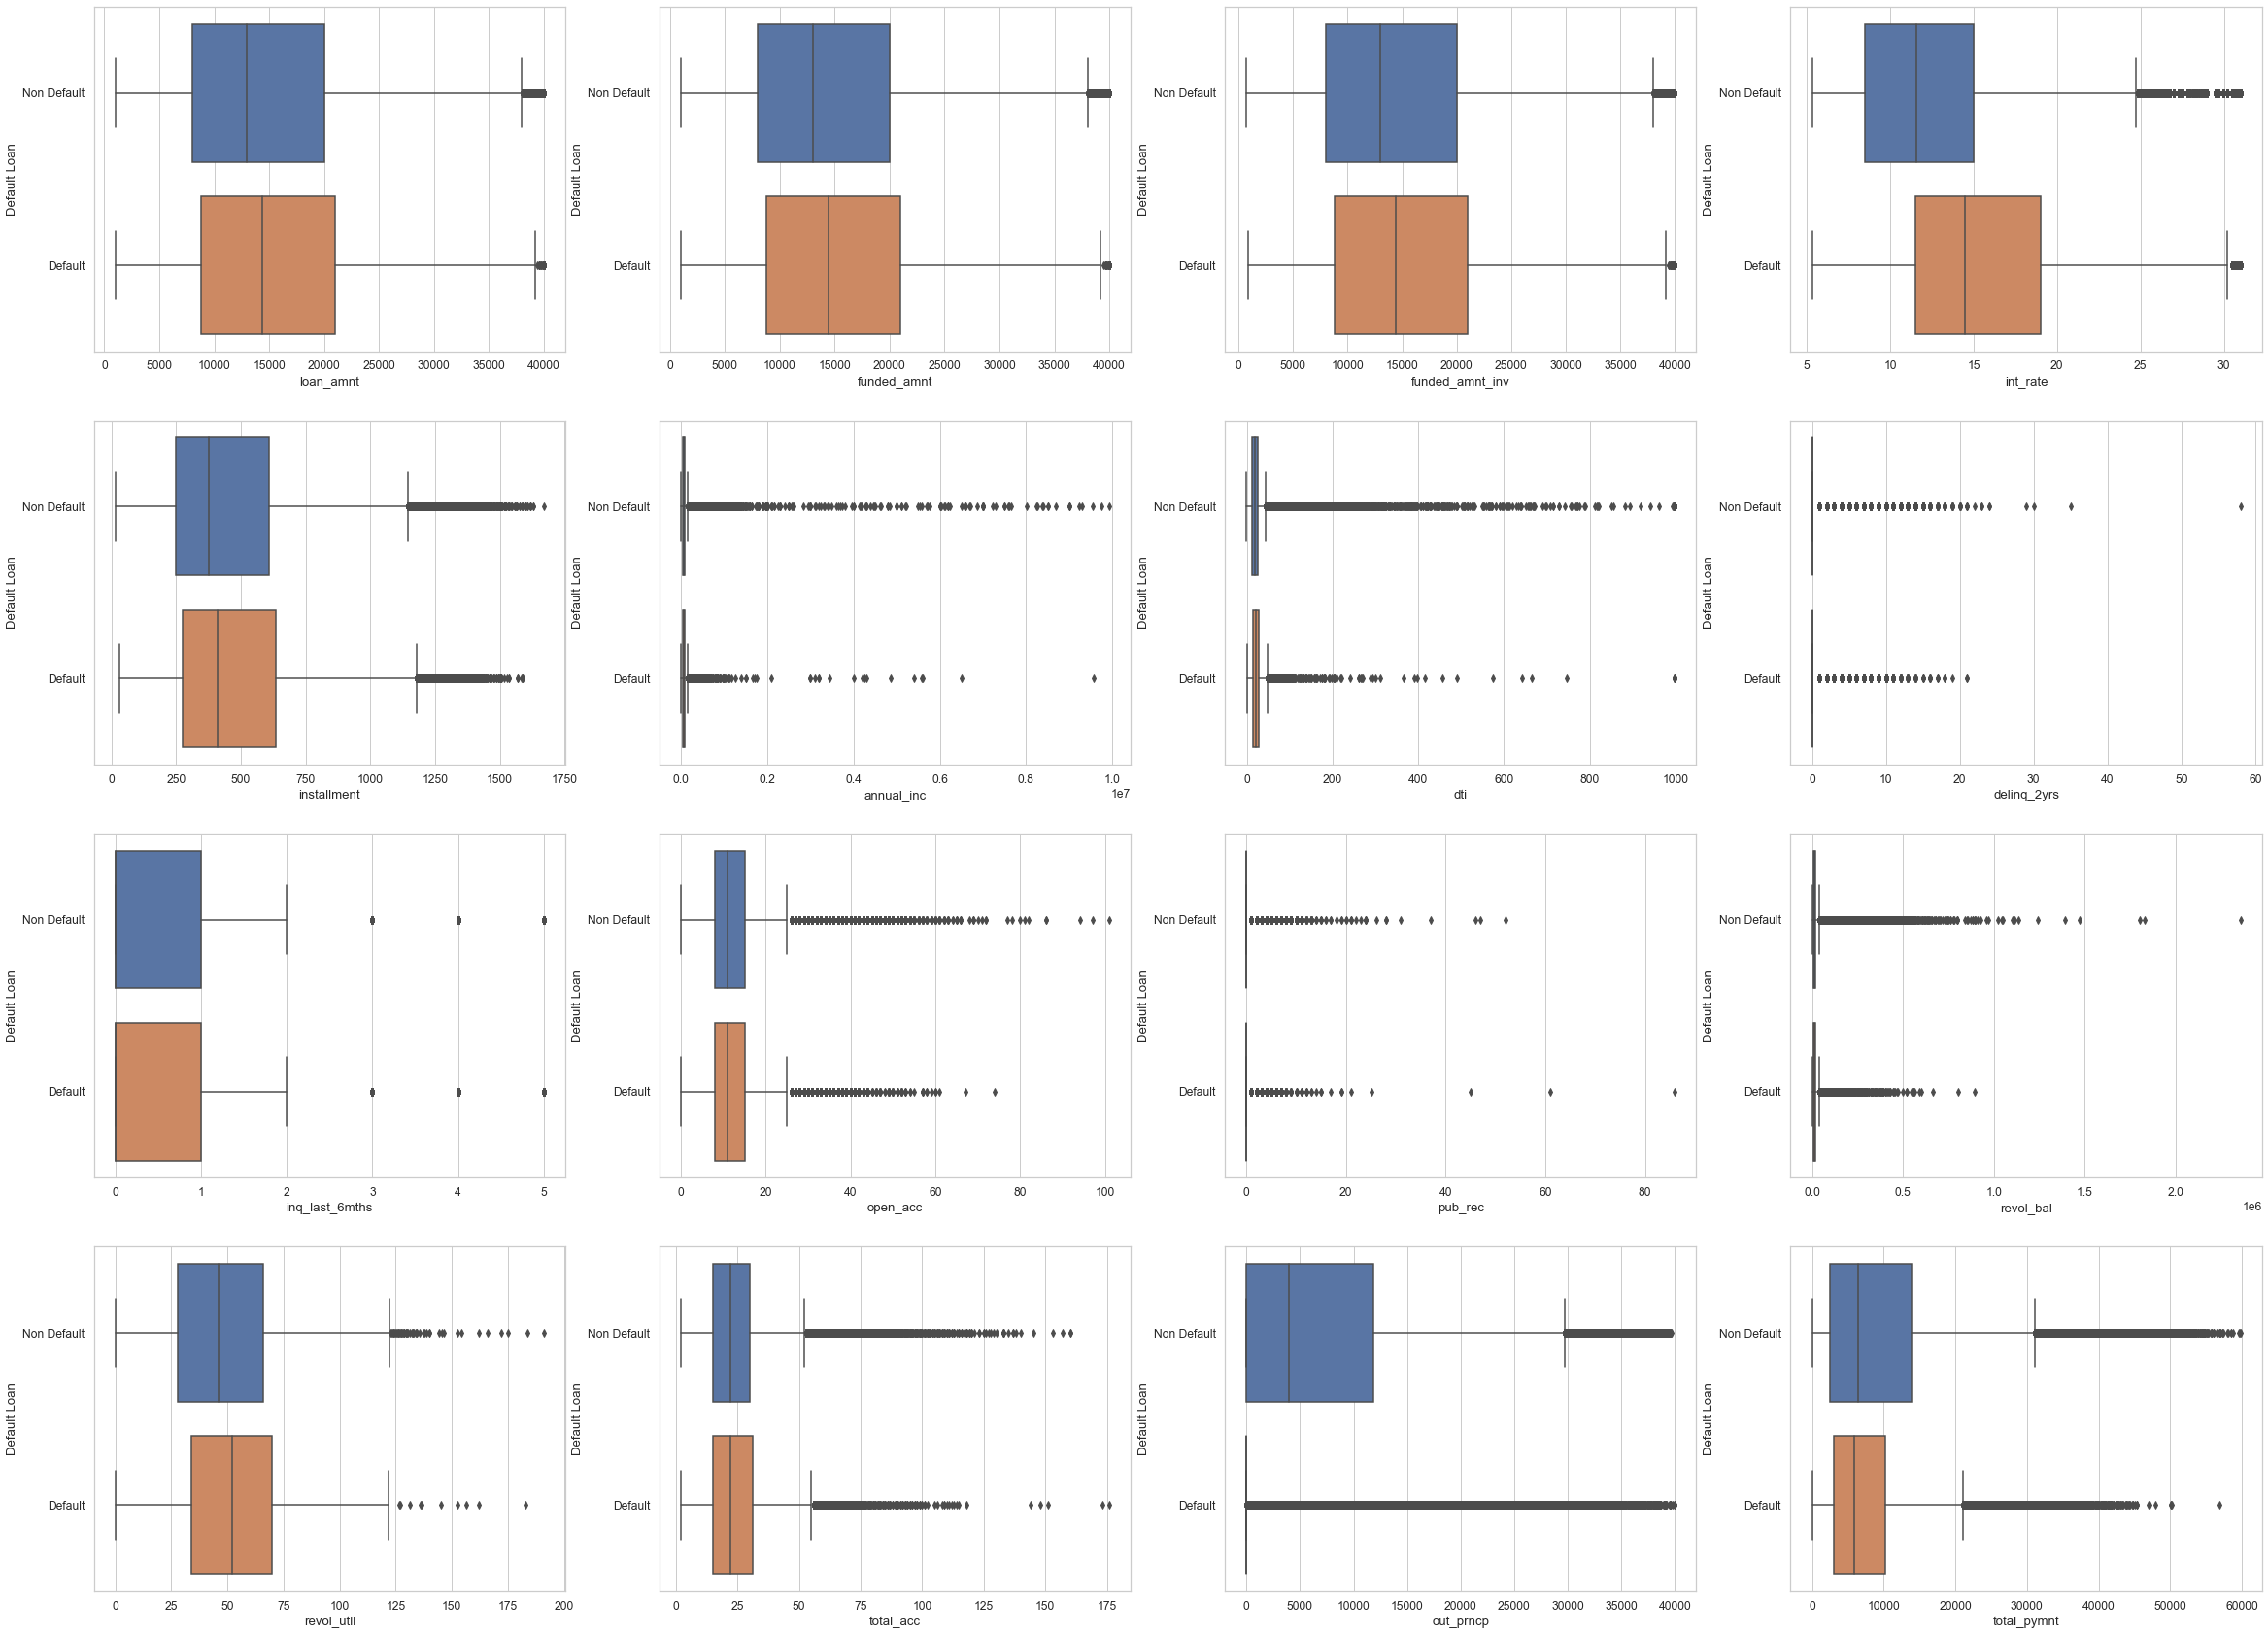

In [16]:
fig, ax = plt.subplots(4, 4, figsize=(40,30))
for var, subplot in zip(df[numerical_variables], ax.flatten()):
    sns.boxplot(x=df[var], y=df['Default Loan'], ax=subplot)
#plt.savefig('outliers2.png')

### 4.4.2 Analysis per Variable

#### Average loan amount per Default

In [17]:
df[['loan_amnt','Default Loan']].groupby(by='Default Loan').mean()

,loan_amnt
Default Loan,
Default,15825.833231
Non Default,15331.204770


Text(0.5, 1.0, 'Loan Amount Distribution per Status')

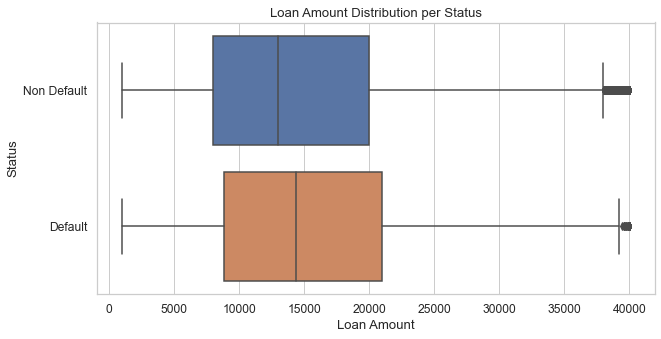

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(df['loan_amnt'],df['Default Loan'])
plt.xlabel('Loan Amount')
plt.ylabel('Status')
plt.title('Loan Amount Distribution per Status')
#plt.savefig('loan_amnt.png')

Text(0.5, 1.0, 'Percentage of the Total Loan Amount by Status')

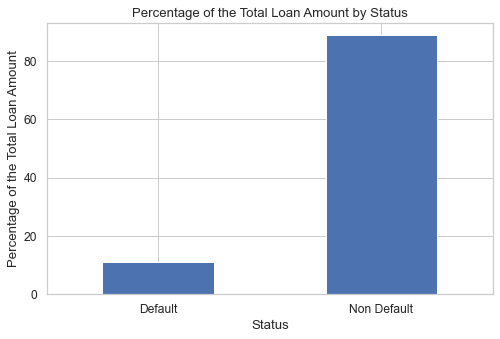

In [19]:
total_funded_amnt=df['loan_amnt'].sum()
test = (df[['loan_amnt','Default Loan']].groupby(by='Default Loan').sum()/total_funded_amnt*100).plot(kind='bar', legend = None)
plt.xlabel('Status')
plt.xticks(rotation=0)
plt.ylabel('Percentage of the Total Loan Amount')
plt.title('Percentage of the Total Loan Amount by Status')
#plt.savefig('loan_amnt_target.png')

#### Number of Default and Non Default per grade

Default Loan,Default,Non Default,% of Default
grade,,,
G,1555,2152,41.9
F,5415,9358,36.7
E,13488,39733,25.3
D,25275,118997,17.5
C,37566,256030,12.8
B,24035,288124,7.7
A,6440,220407,2.8


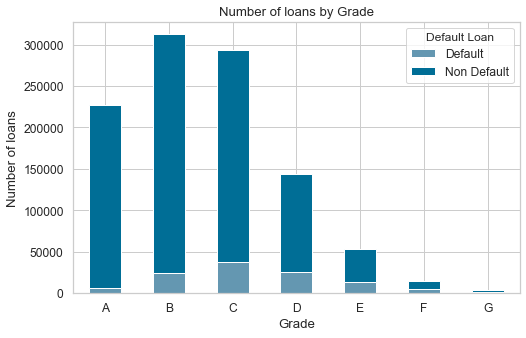

In [20]:
default_grade = df[['grade', 'Default Loan', 'id']]
default_grade = default_grade.pivot_table(values='id', columns='Default Loan', index='grade', aggfunc='count')
default_grade.iloc[:,0:2].plot.bar(stacked = True, figsize=(8,5), color=colors)
plt.xlabel('Grade')
plt.xticks(rotation=0)
plt.ylabel('Number of loans')
plt.title('Number of loans by Grade')
default_grade['% of Default'] = ((default_grade['Default'] / (default_grade['Default'] + default_grade['Non Default']))*100).round(1)
default_grade.sort_values('% of Default', ascending=False)
#plt.savefig('grade.png')

We can see that clients with grade G, F and E are the ones with proportion of Default Loans, what mayby can explain the fact that these 3 grades are the ones with less clients.

### Check average loan amount per grade

Text(0, 0.5, 'Average Loan Amount')

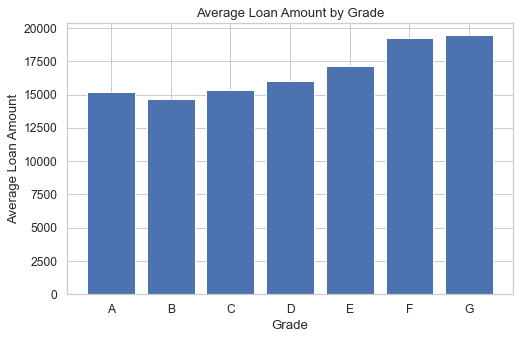

In [21]:
avg_loan_amount_by_grade=df[['loan_amnt','grade']].groupby('grade').mean()
plt.bar(x=avg_loan_amount_by_grade.index,height=avg_loan_amount_by_grade['loan_amnt'])
plt.title('Average Loan Amount by Grade')
plt.xlabel('Grade')
plt.xticks(rotation=0)
plt.ylabel('Average Loan Amount')
#plt.savefig('Avg_Loan_Amnt_Grade.png')

We can see that the grades where de propotion of default is higher are the ones where the average Loan Amount is higher.

Text(0, 0.5, 'Average Total Payment')

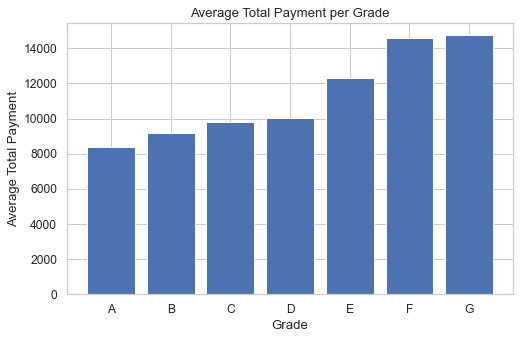

In [22]:
avg_installment_by_grade=df[['total_pymnt','grade']].groupby('grade').mean()
plt.bar(x=avg_installment_by_grade.index,height=avg_installment_by_grade['total_pymnt'])
plt.title('Average Total Payment per Grade')
plt.xlabel('Grade')
plt.xticks(rotation=0)
plt.ylabel('Average Total Payment')
#plt.savefig('total_pymnt_grade.png')

#### Defult and Non Default Loans per Term

Default Loan,Default,Non Default,% of Default
term,,,
60 months,40572,258908,13.5
36 months,73202,675893,9.8


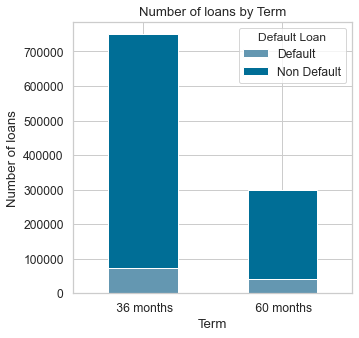

In [23]:
term =df[['term', 'Default Loan', 'id']]
term = term.pivot_table(values='id', columns='Default Loan', index='term', aggfunc='count')
term.iloc[:,0:2].plot.bar(stacked = True, figsize=(5,5), color=colors)
plt.xlabel('Term')
plt.xticks(rotation=0)
plt.ylabel('Number of loans')
plt.title('Number of loans by Term')
term['% of Default'] = ((term['Default'] / (term['Default'] + term['Non Default']))*100).round(1)
term.sort_values('% of Default', ascending=False)
#plt.savefig('term.png')

#### Check emp_lenght variable

Text(0, 0.5, 'Default Rate')

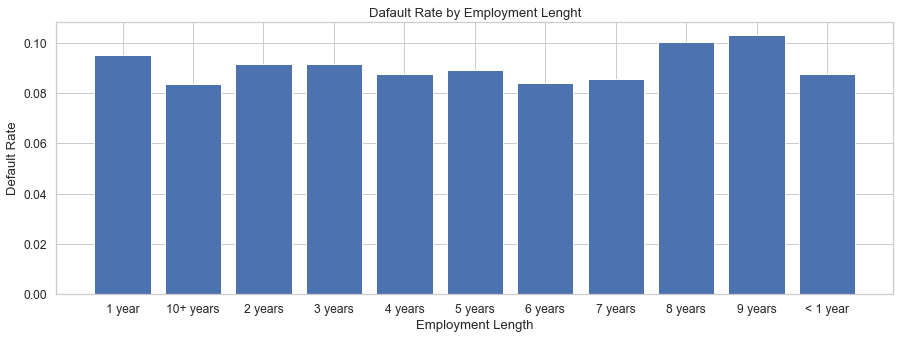

In [24]:
Default_rates = df.groupby('emp_length')['loan_status'].value_counts(normalize=True)[:,'Charged Off']
plt.figure(figsize=(15,5))
plt.bar(x=Default_rates.index,height=Default_rates.values)
plt.title('Dafault Rate by Employment Lenght')
plt.xlabel('Employment Length')
plt.xticks(rotation=0)
plt.ylabel('Default Rate')
#plt.savefig('defaultRate_emp_lenght.png')

Default Loan,Default,Non Default,% of Default
emp_length,,,
8 years,4881,35992,11.9
9 years,4044,30087,11.8
1 year,8066,61975,11.5
2 years,10476,84196,11.1
3 years,9424,75480,11.1
5 years,6990,57431,10.9
4 years,6817,57084,10.7
< 1 year,9087,76705,10.6
7 years,3796,32799,10.4


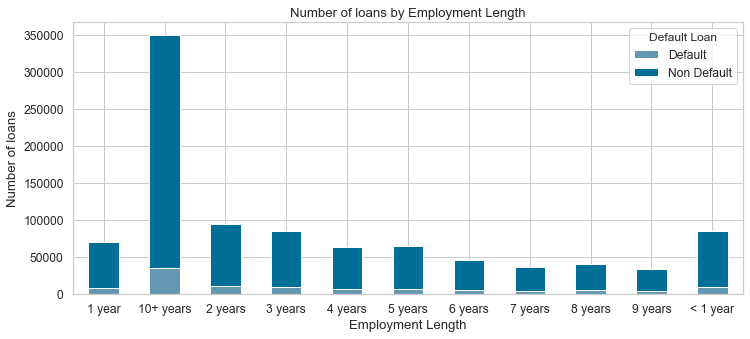

In [25]:
emply_lenght = df[['emp_length', 'Default Loan', 'id']]
emply_lenght = emply_lenght.pivot_table(values='id', columns='Default Loan', index='emp_length', aggfunc='count')
emply_lenght.plot.bar(stacked = True, figsize=(12,5), color=colors)
plt.xlabel('Employment Length')
plt.xticks(rotation=0)
plt.ylabel('Number of loans')
plt.title('Number of loans by Employment Length')
emply_lenght['% of Default'] = ((emply_lenght['Default'] / (emply_lenght['Default'] + emply_lenght['Non Default']))*100).round(1)
emply_lenght.sort_values('% of Default', ascending=False)
#plt.savefig('emp_lenght.png')

#### Home ownership

Default Loan,Default,Non Default,% of Default
home_ownership,,,
RENT,52313,359408,12.7
OWN,14111,112407,11.2
MORTGAGE,47319,462418,9.3
ANY,31,568,5.2


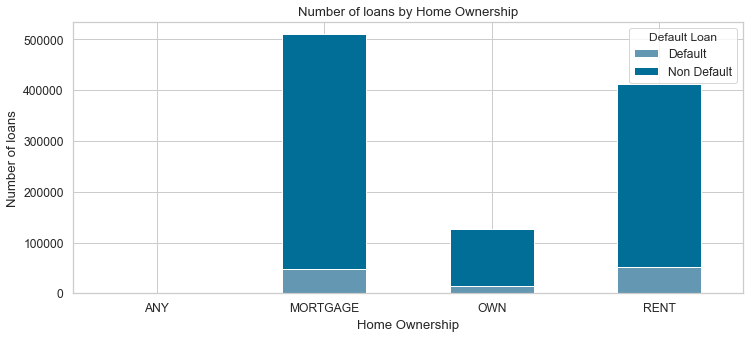

In [26]:
home_own = df[['home_ownership', 'Default Loan', 'id']]
home_own = home_own.pivot_table(values='id', columns='Default Loan', index='home_ownership', aggfunc='count')
home_own.plot.bar(stacked = True, figsize=(12,5), color=colors)
plt.xlabel('Home Ownership')
plt.xticks(rotation=0)
plt.ylabel('Number of loans')
plt.title('Number of loans by Home Ownership')
home_own['% of Default'] = ((home_own['Default'] / (home_own['Default'] + home_own['Non Default']))*100).round(1)
home_own.sort_values('% of Default', ascending=False)
#plt.savefig('home_ownership.png')

#### Anual Income

In [27]:
df['annual_inc'] = df['annual_inc'].apply(lambda x:np.log10(x+1))

Text(0.5, 1.0, 'Distribution of Annual Income by Status')

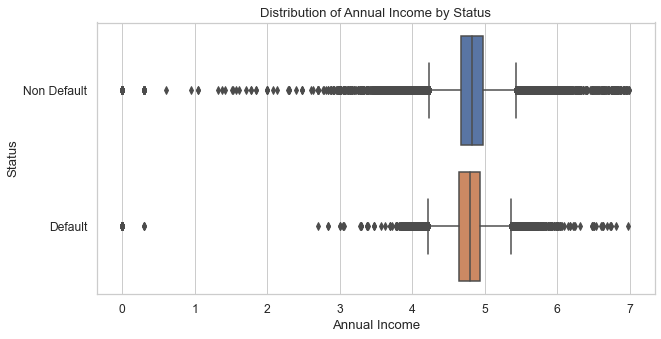

In [28]:
plt.figure(figsize=(10,5))
sns.boxplot(df['annual_inc'],df['Default Loan'])
plt.xlabel('Annual Income')
plt.xticks(rotation=0)
plt.ylabel('Status')
plt.title('Distribution of Annual Income by Status')
#plt.savefig('annual_inc.png')

#### Purpose

Default Loan,Default,Non Default,% of Default
purpose,,,
small_business,1774,8622,17.1
wedding,1,6,14.3
moving,964,6027,13.8
renewable_energy,86,560,13.3
medical,1640,11738,12.3
debt_consolidation,68139,508222,11.8
other,7707,61913,11.1
major_purchase,2657,21687,10.9
vacation,788,6563,10.7


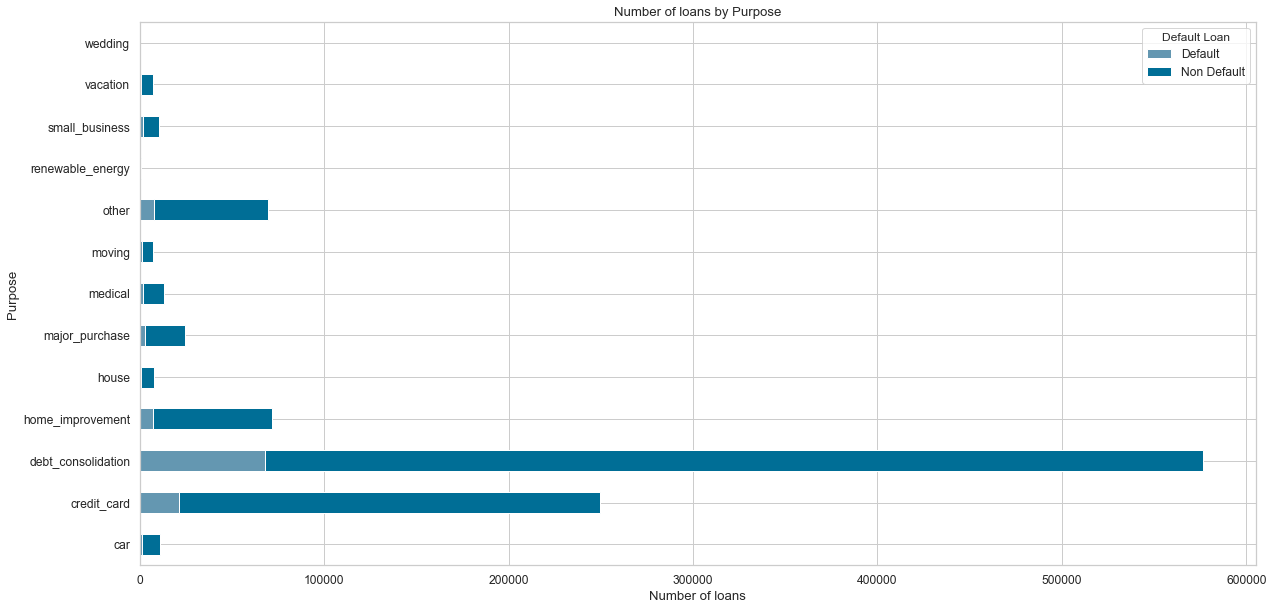

In [29]:
purpose = df[['purpose', 'Default Loan', 'id']]
purpose = purpose.pivot_table(values='id', columns='Default Loan', index='purpose', aggfunc='count')
purpose.iloc[:,0:2].plot.barh(stacked = True, figsize=(20,10), color=colors)
plt.xlabel('Number of loans')
plt.ylabel('Purpose')
plt.title('Number of loans by Purpose')
purpose['% of Default'] = ((purpose['Default'] / (purpose['Default'] + purpose['Non Default']))*100).round(1)
purpose.sort_values('% of Default', ascending=False)
#plt.savefig('purpose.png')

#### Adress State

Default Loan,Default,Non Default,% of Default
addr_state,,,
AL,1646,10814,13.2
OK,1263,8517,12.9
MS,865,5841,12.9
LA,1473,10039,12.8
AR,1028,7056,12.7
NE,627,4459,12.3
HI,560,4108,12.0
NY,10141,74726,11.9
FL,9045,68368,11.7


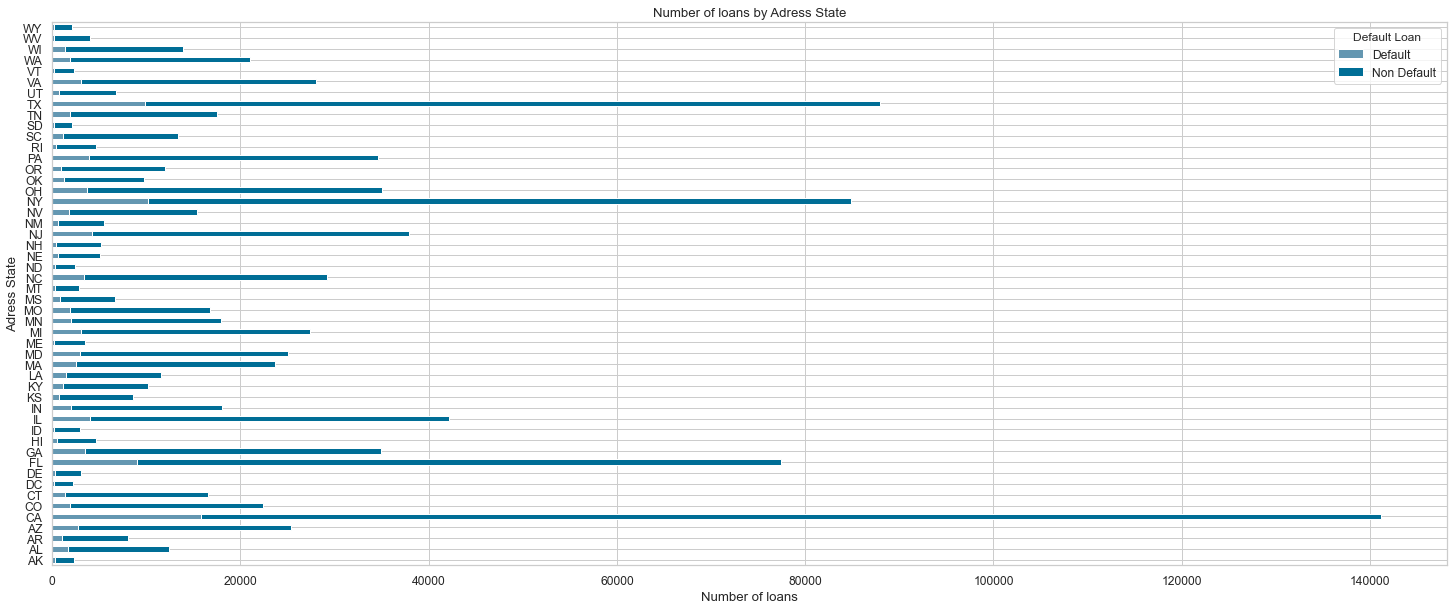

In [30]:
addr_state = df[['addr_state', 'Default Loan', 'id']].drop_duplicates()
addr_state = addr_state.pivot_table(values='id', columns='Default Loan', index='addr_state', aggfunc='count')
addr_state.iloc[:,0:2].plot.barh(stacked = True, figsize=(25,10), color=colors)
plt.xlabel('Number of loans')
plt.ylabel('Adress State')
plt.title('Number of loans by Adress State')
addr_state['% of Default'] = ((addr_state['Default'] / (addr_state['Default'] + addr_state['Non Default']))*100).round(1)
addr_state.sort_values('% of Default', ascending=False).head(10)
#plt.savefig('state.png')

#### DTI

Text(0.5, 1.0, 'DTI by loan status')

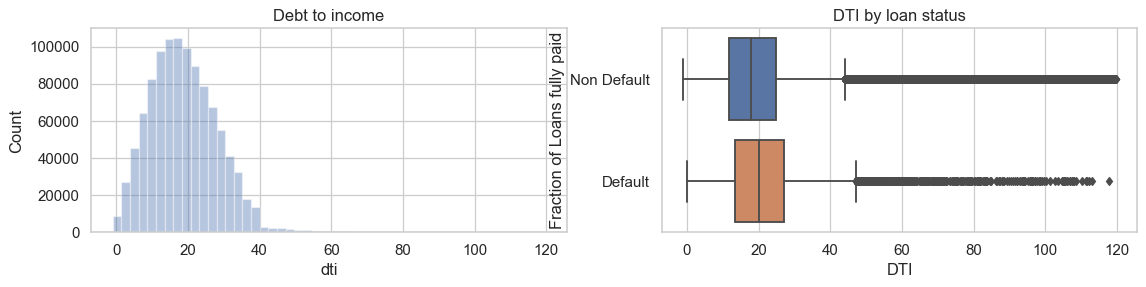

In [31]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,3), dpi=90)
sns.distplot(df.loc[df['dti'].notnull() & (df['dti'] < 120), 'dti'], kde=False, ax=ax1)
ax1.set_xlabel('dti')
ax1.set_ylabel('Count')
ax1.set_title('Debt to income')
sns.boxplot(x=df.loc[df['dti'].notnull() & (df['dti'] < 120), 'dti'], y='Default Loan', data=df, ax=ax2)
ax2.set_xlabel('DTI')
ax2.set_ylabel('Fraction of Loans fully paid')
ax2.set_title('Fully paid rate by debt to income')
ax2.set_title('DTI by loan status')
#plt.savefig('dti.png')

Check the median of DTI per Status:

In [32]:
df.groupby('Default Loan')['dti'].median()

Default Loan
Default        20.03
Non Default    17.82
Name: dti, dtype: float64

#### Open Credit Lines

Text(0.5, 1.0, 'Open Credit Lines Dsitirbution per Status')

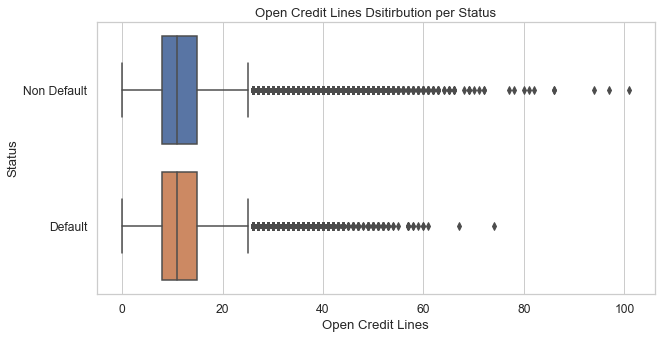

In [33]:
plt.figure(figsize=(10,5))
sns.boxplot(x='open_acc', y='Default Loan', data=df)
plt.xlabel('Open Credit Lines')
plt.xticks(rotation=0)
plt.ylabel('Status')
plt.title('Open Credit Lines Dsitirbution per Status')
#plt.savefig('open_acc.png')

#### Issue Date

First let's check the number of loans issued per month and year:

In [34]:
df['issue_d'] = df['issue_d'].replace({'Jan-':'1-', 'Feb-':'2-', 'Mar-': '3-', 'Apr-': '4-', 'May-': '5-', 'Jun-': '6-', 'Jul-': '7-', 'Aug-':'8-', 'Sep-': '9-', 'Oct-': '10-', 'Nov-': '11-', 'Dec-': '12-'}, regex=True).apply(lambda x:dt.strptime('01-'+x,'%d-%m-%y').date())
df['issue_d'] = pd.to_datetime(df['issue_d'],  format = '%Y-%m-%d')

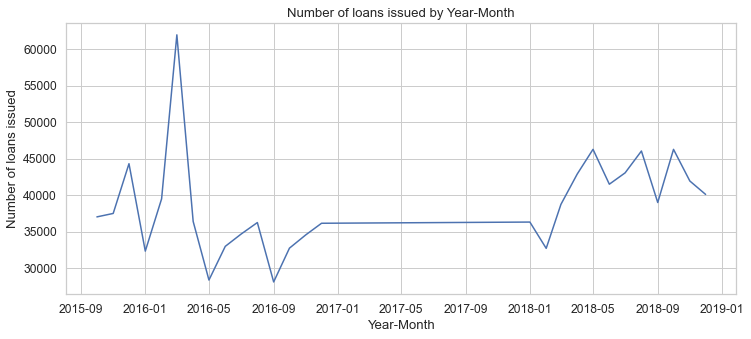

In [35]:
issue_d = pd.DataFrame(df.groupby(['issue_d'])['id'].count()).reset_index()
plt.figure(figsize=(12,5))
plt.plot(issue_d['issue_d'], issue_d['id'])
plt.xlabel('Year-Month')
plt.ylabel('Number of loans issued')
plt.title('Number of loans issued by Year-Month')
#plt.savefig('N_Loans_Year_Month.png')
plt.show()

Check the number of loans issued by Year:

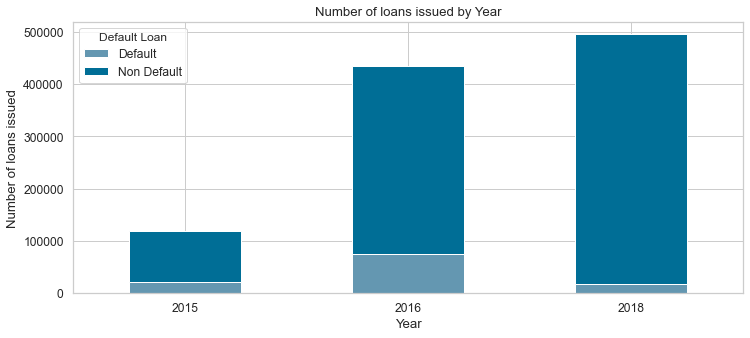

Default Loan,Default,Non Default,% of Default
issue_y,,,
2015,21633,97293,18.2
2016,74457,359950,17.1
2018,17684,477558,3.6


In [36]:
df['issue_y'] = df['issue_d'].dt.year
issue_y = df.pivot_table(values='id', columns='Default Loan', index='issue_y', aggfunc='count')
issue_y.plot.bar(stacked = True, figsize=(12,5), color=colors)
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.ylabel('Number of loans issued')
plt.title('Number of loans issued by Year')
#plt.savefig('N_Loans_Year.png')
plt.show()
issue_y['% of Default'] = ((issue_y['Default'] / (issue_y['Default'] + issue_y['Non Default']))*100).round(1)
issue_y.sort_values('% of Default', ascending=False).head(10)

Check the number of loans issuded by month:

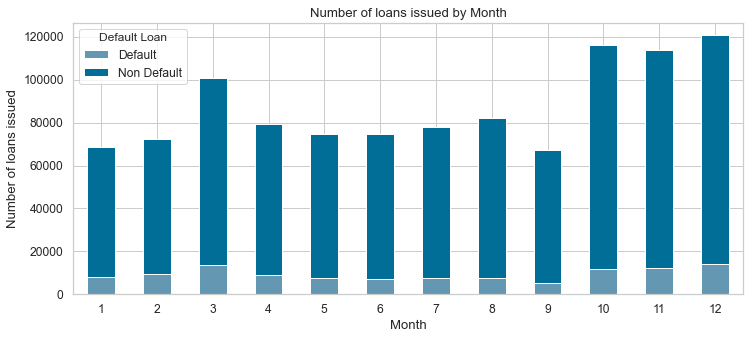

Default Loan,Default,Non Default,% of Default
issue_m,,,
3,13690,87073,13.6
2,9316,62959,12.9
1,8216,60497,12.0
12,14263,106397,11.8
4,8996,70364,11.3
11,12323,101769,10.8
10,11806,104326,10.2
5,7458,67256,10.0
7,7588,70197,9.8


In [37]:
df['issue_m'] = df['issue_d'].dt.month
issue_m = df.pivot_table(values='id', columns='Default Loan', index='issue_m', aggfunc='count')
issue_m.plot.bar(stacked = True, figsize=(12,5), color=colors)
plt.xlabel('Month')
plt.xticks(rotation=0)
plt.ylabel('Number of loans issued')
plt.title('Number of loans issued by Month')
#plt.savefig('N_Loans_Month.png')
plt.show()
issue_m['% of Default'] = ((issue_m['Default'] / (issue_m['Default'] + issue_m['Non Default']))*100).round(1)
issue_m.sort_values('% of Default', ascending=False).head(10)

#### Earliest Credit Line

 - <b>Create a new variable 'days_antiguity'</b> which represents the number of days before the loan issued

In [38]:
df['earliest_cr_line'] = df['earliest_cr_line'].replace({'Jan-':'1-', 'Feb-':'2-', 'Mar-': '3-', 'Apr-': '4-', 'May-': '5-', 'Jun-': '6-', 'Jul-': '7-', 'Aug-':'8-', 'Sep-': '9-', 'Oct-': '10-', 'Nov-': '11-', 'Dec-': '12-'}, regex=True).apply(lambda x:dt.strptime('01-'+x,'%d-%m-%y').date())

In [39]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'],  format = '%Y-%m-%d')

In [40]:
df['days_antiguity']=(df['issue_d']-df['earliest_cr_line']).apply(lambda x:int(str(x).split(' ')[0]))

Let's check if there is any cases where the 'earliest_cr_line' is greater then the 'issue_d':

In [41]:
df.loc[:,['issue_d', 'earliest_cr_line', 'days_antiguity']][df['days_antiguity']<0]

,issue_d,earliest_cr_line,days_antiguity
2315,2018-12-01,2065-11-01,-17137
4289,2018-12-01,2068-11-01,-18233
5128,2018-12-01,2062-04-01,-15827
5284,2018-12-01,2061-05-01,-15492
6147,2018-12-01,2067-07-01,-17744
...,...,...,...
1046862,2015-10-01,2064-06-01,-17776
1047900,2015-10-01,2066-08-01,-18567
1048068,2015-10-01,2064-02-01,-17655
1048183,2015-10-01,2068-03-01,-19145


As we can see, there are 2161 cases where the 'earliest_cr_line' is greater then the 'issue_d'. In most of the cases the year corresponds to years higher then the current year. Due to this, we will drop this rows, once we can't take to risk to consider this cases on our models.

In [42]:
df = df[df.days_antiguity > 0]

Now let's check the Days of Antiguity distribution by Status:

Text(0.5, 1.0, 'Days of Antiguity Distribution by Status')

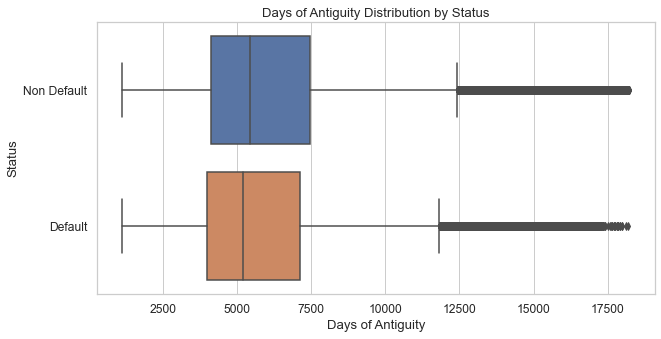

In [43]:
plt.figure(figsize=(10,5))
sns.boxplot(x='days_antiguity', y='Default Loan', data=df)
plt.xlabel('Days of Antiguity')
plt.ylabel('Status')
plt.title('Days of Antiguity Distribution by Status')
#plt.savefig('days_antiguity.png')

#### Deliquency

Text(0.5, 1.0, 'Delinq_2yrs Distribution by Status')

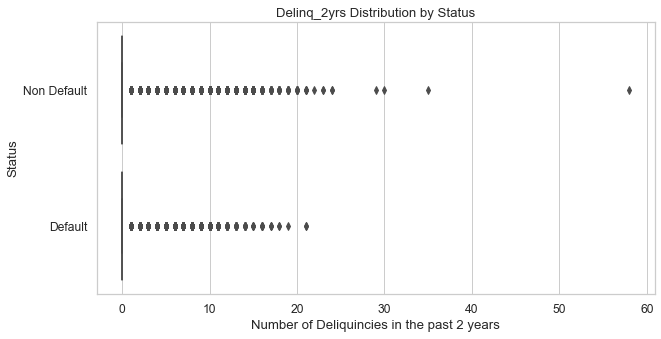

In [44]:
plt.figure(figsize=(10,5))
#df2 = df[df.delinq_2yrs < 5]
sns.boxplot(x='delinq_2yrs', y='Default Loan', data=df)
plt.xlabel('Number of Deliquincies in the past 2 years')
plt.ylabel('Status')
plt.title('Delinq_2yrs Distribution by Status')
#plt.savefig('delinq_2yrs.png')

We decided to transform this variable in a new one, rather counting the number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years, we will just check if the borrower had already a 30+ days past-due incidences of delinquency in his credit file for the past 2 years.

New variable **'delinq'**:
 - if delinq_2yrs > 0 then 1
 - if delinq_2yrs = 0 then 0
     

In [45]:
df['delinq'] =  [1 if x > 0 else 0 for x in df['delinq_2yrs']]

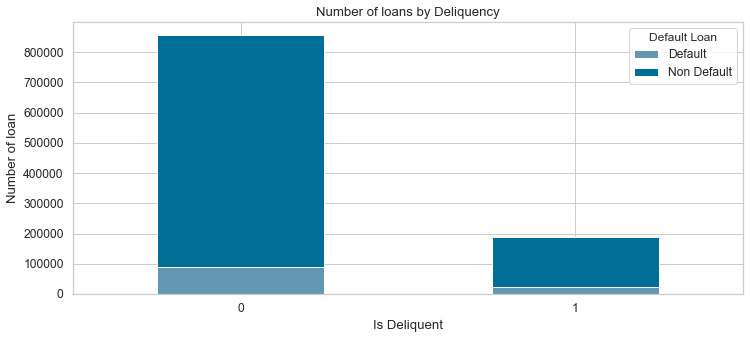

Default Loan,Default,Non Default,% of Default
delinq,,,
1,24480,164873,12.9
0,88948,768113,10.4


In [46]:
delinq = df.pivot_table(values='id', columns='Default Loan', index='delinq', aggfunc='count')
delinq.plot.bar(stacked = True, figsize=(12,5), color=colors)
plt.xlabel('Is Deliquent')
plt.xticks(rotation=0)
plt.ylabel('Number of loan')
plt.title('Number of loans by Deliquency')
#plt.savefig('N_Loans_Delinquency.png')
plt.show()
delinq['% of Default'] = ((delinq['Default'] / (delinq['Default'] + delinq['Non Default']))*100).round(1)
delinq.sort_values('% of Default', ascending=False).head(10)

#### Verification Status

Default Loan,Default,Non Default,% of Default
verification_status,,,
Verified,40978,221292,15.6
Source Verified,47626,379850,11.1
Not Verified,24824,331844,7.0


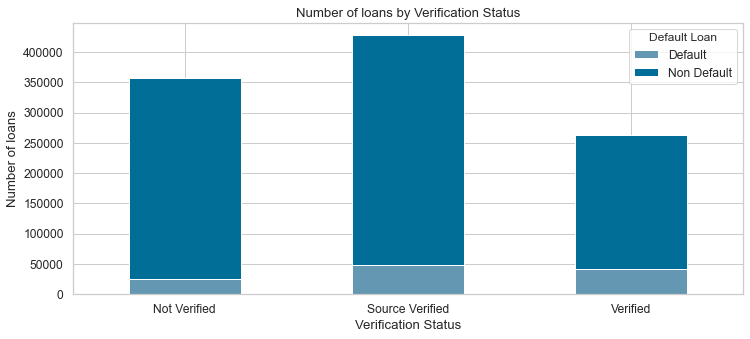

In [47]:
verification = df[['verification_status', 'Default Loan', 'id']]
verification = verification.pivot_table(values='id', columns='Default Loan', index='verification_status', aggfunc='count')
verification.plot.bar(stacked = True, figsize=(12,5), color=colors)
plt.xlabel('Verification Status')
plt.xticks(rotation=0)
plt.ylabel('Number of loans')
plt.title('Number of loans by Verification Status')
verification['% of Default'] = ((verification['Default'] / (verification['Default'] + verification['Non Default']))*100).round(1)
verification.sort_values('% of Default', ascending=False)
#plt.savefig('verification.png')

### 4.4.3 - Check Data Consistency

**Is there any case where the loan_amnt or the funded_amnt is negative?**

In [48]:
df['id'][(df.loan_amnt < 0)| (df.funded_amnt < 0)].count()

0

**Is there any case where the funded_amnt_inv is higher than the funded_amnt?**

In [49]:
df['id'][df.funded_amnt_inv > df.funded_amnt ].count()

0

**Is there any case where the int_rate is negative?**

In [50]:
df['id'][df.int_rate < 0].count()

0

**Is there any case where the annual_inc is higher then the installment * 12?**

In [51]:
df['id'][df.annual_inc > df.installment * 12].count()

0

<a  id="cleaning">

## 4.5. Data Cleaning
</a>


### 4.5.1 Treat Missing Values

We saw that the columns emp_title, emp_length, dti, revol_util and inq_last_6mths have missing values. In order resolve this, we decided to:
 - For the numerical variables (dti, revol_util and inq_last_6mths) replace missing values by the medians;
 - For the variable emp_length, delete the rows with missing, once they just represent 7,4% of the data
 - For the variable emp_title we decided to drop this columns, once it has to many different values.

In [52]:
#Replace missing values by de median
missing_values = ['dti', 'revol_util', 'inq_last_6mths'] 
for col in missing_values:
    med=df[col].median()
    df[col]=df[col].apply(lambda x: med if np.isnan(x) else x)

In [53]:
#Drop rows where emp_length is null
df = df[~df.emp_length.isnull()]

In [54]:
#Drop emp_title column
df = df.loc[:, df.columns != 'emp_title']

In [55]:
# Total missing values
mis_val = df.isnull().sum()
# Percentage of missing values
mis_val_percent = 100 * df.isnull().sum() / len(df)
mis_val_type = df.dtypes
# Make a table with the results
mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_type], axis=1)

# Rename the columns
mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'type'})

# Sort the table by percentage of missing descending
mis_val_table_ren_columns = mis_val_table_ren_columns[ mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)

# Print some summary information
print ("The dataframe has " + str(df.shape[1]) + " columns.\n" "There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")

# Return the dataframe with missing information
mis_val_table_ren_columns

The dataframe has 32 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,type


### 4.5.2 Treat Outliers

In order to treat the outliers previously analyzed we will make a filter to exclude the outliers from the following variables:

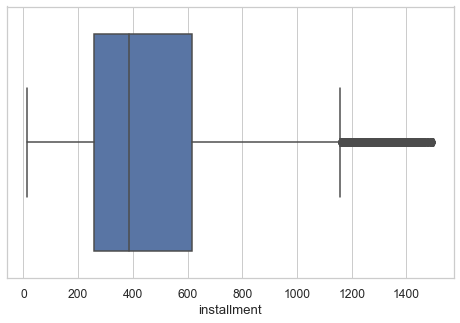

In [56]:
#Installment
df = df[df.installment < 1500]
sns.boxplot(df['installment'])

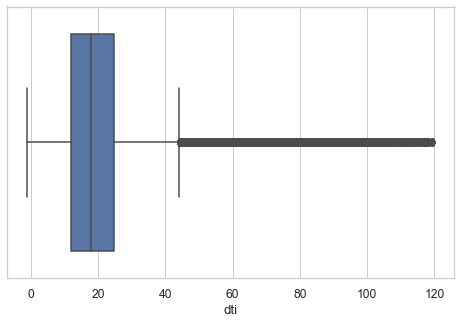

In [57]:
#DTI
df = df[df.dti < 120]
sns.boxplot(df['dti'])

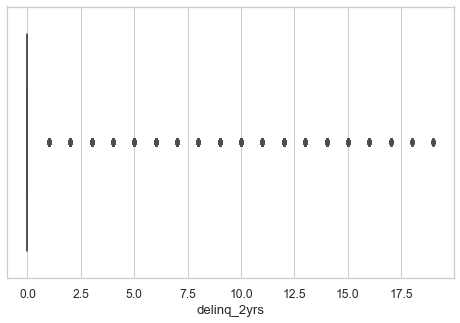

In [58]:
#delinq_2yrs
df = df[df.delinq_2yrs < 20]
sns.boxplot(df['delinq_2yrs'])

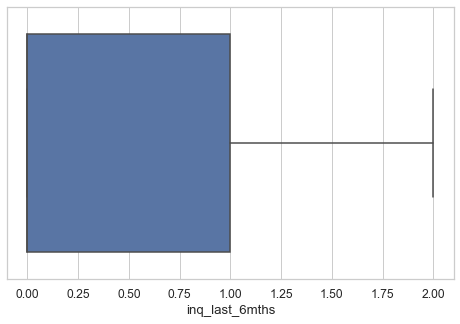

In [59]:
#inq_last_6mths
df = df[df.inq_last_6mths < 3]
sns.boxplot(df['inq_last_6mths'])

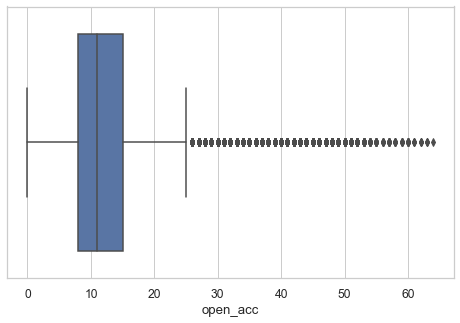

In [60]:
#Open_acc
df = df[df.open_acc < 65]
sns.boxplot(df['open_acc'])

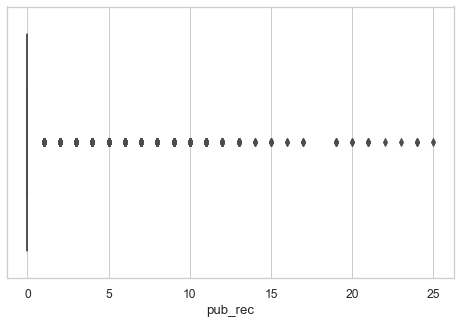

In [61]:
#pub_rec
df = df[df.pub_rec <= 25]
sns.boxplot(df['pub_rec'])

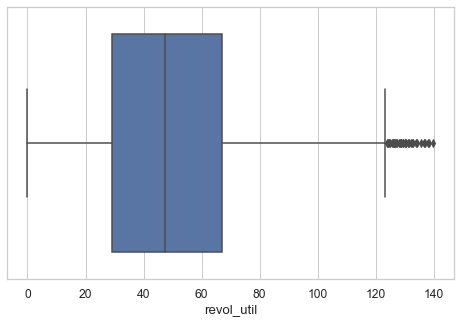

In [62]:
#revol_util
df = df[df.revol_util < 140]
sns.boxplot(df['revol_util'])

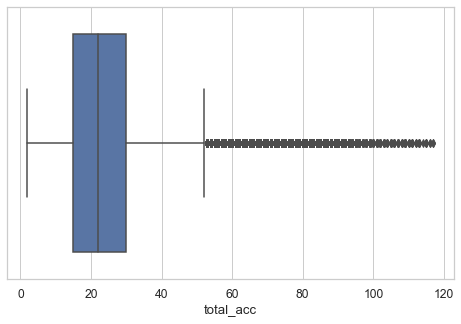

In [63]:
#total_acc
df = df[df.total_acc < 118]
sns.boxplot(df['total_acc'])

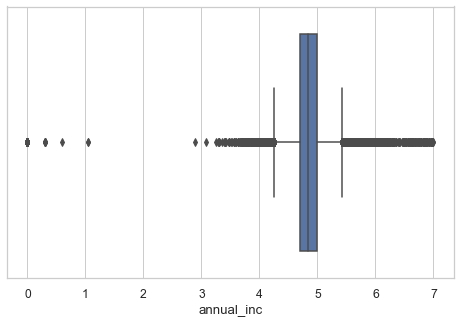

In [64]:
#annual_inc - check outlier without scientific notation
sns.boxplot(df['annual_inc'])
plt.ticklabel_format(style='plain', axis='x')
plt.show()

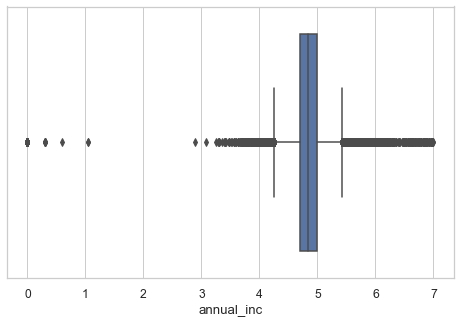

In [65]:
#annual_inc - without outliers
df = df[df.annual_inc < 1400000]
sns.boxplot(df['annual_inc'])
plt.ticklabel_format(style='plain', axis='x')
plt.show()

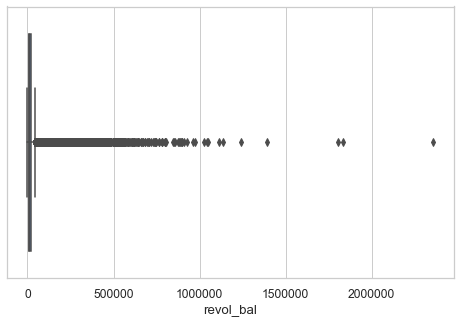

In [66]:
#revol_bal - check outlier without scientific notation
sns.boxplot(df['revol_bal'])
plt.ticklabel_format(style='plain', axis='x')
plt.show()

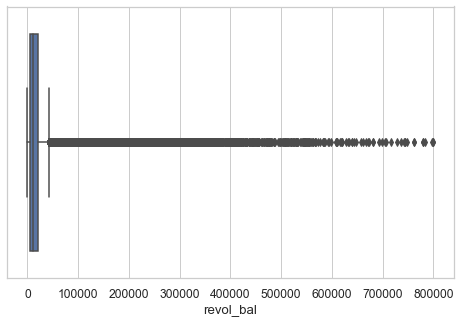

In [67]:
#revol_bal - without outliers
df = df[df.revol_bal < 800000]
sns.boxplot(df['revol_bal'])
plt.ticklabel_format(style='plain', axis='x')
plt.show()

<a  id="feature">

## 4.6. Feature Engineering

</a>


### 4.6.1 Tranform Target Variable

Encode the target variable, which correspond to the column 'Default Loan'.

In [68]:
df['Default Loan'] = df['Default Loan'].replace({'Default': 1, "Non Default": 0})

### 4.6.2 Encode Categorigal Variables

- Transform categorical variables into ordinal variables by using LabelEncoder

In [69]:
cat_var_to_encode = ['term', 'grade', 'home_ownership', 'verification_status', 'purpose']

In [70]:
labelencoder = LabelEncoder()
for col in cat_var_to_encode:
    column = col + "_cat"
    df[column] = labelencoder.fit_transform(df[col])
df = df.drop(columns = cat_var_to_encode)

- Transform 'emp_lenght' variable into a numeric variable

In [71]:
df['emp_length'] = df['emp_length'].replace({'< 1 year':0, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9, '10+ years': 10})

Beside this transformations, on the analysis stage we already did the following transformations:
 - Converted the variable 'issue_d' to a date
 - Converted the variable 'earliest_cr_line' to a date
 - Created the variable 'days_antiguity', based on the difference between the variables issue_d and earliest_cr_line
 - Created the variable 'delinq' based on the variable delinq_2yrs

<hr>
<a class="anchor" id="feature">
    
# 5. Feature Selection
    
</a>

For the model, we can start by excluding the following variables:
 - **id** - doesn't make sense to use this variable on the model;
 - **issue_d** - it's already incorporated in the new variable created 'days_antiguity';
 - **earliest_cr_line** - it's already incorporated in the new variable created 'days_antiguity';
 - **delinq_2yrs** - it's already incorporated in the new variable created 'delinq';
 - **loan_status** - was used to create the target variable;
 - **addr_state** - there too many different values in this variable, so we wont use it.
 - **total_pymnt** - this variable leaks future information so we will not used it for training.

In [72]:
variables = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'int_rate', 'emp_length', 'annual_inc', 'dti', 'delinq', 'days_antiguity', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'Default Loan', 'term_cat', 'grade_cat', 'home_ownership_cat', 'verification_status_cat', 'purpose_cat']

In [73]:
corr = df[variables]

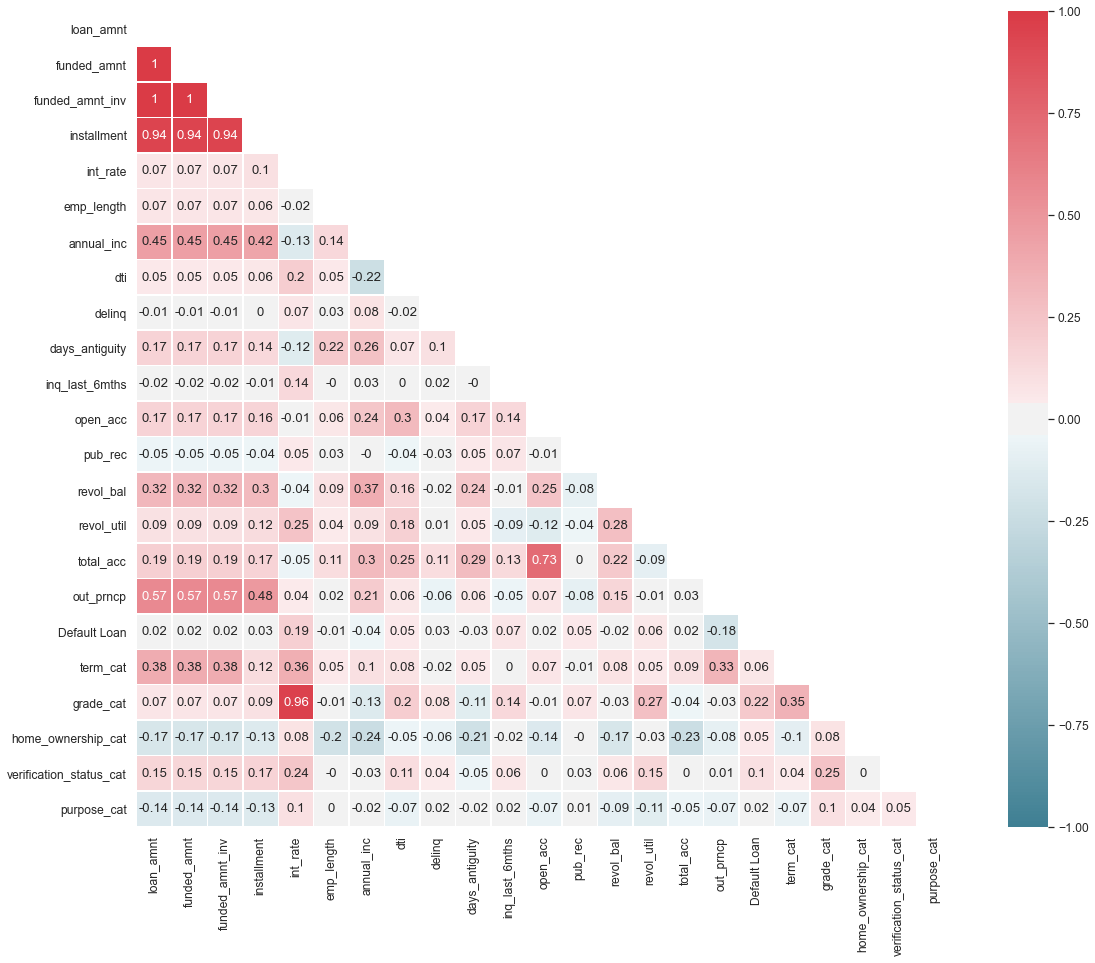

In [74]:
# Define the model to standardize the data
scaler = StandardScaler()

# Fit to data, then transform it
variables_Norm = scaler.fit_transform(corr)

# Create a dataframe with the variables fitted with the columns from data 
variables_Norm = pd.DataFrame(variables_Norm, columns = corr.columns)

# Compute the correlation:
correlation = variables_Norm.corr().round(2)

# Generate a mask for the upper triangle
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,square=True, linewidths=.5, annot=True)

Considering the correlations, in order to delete redundant variables, we will drop the variables with higher correlations, which are the following:
 - open_acc
 - funded_amnt
 - funded_amnt_inv
 - installment
 - int_rate

In [75]:
variables = ['loan_amnt', 'emp_length', 'annual_inc', 'dti', 'delinq', 'days_antiguity', 'inq_last_6mths', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'term_cat', 'grade_cat', 'home_ownership_cat', 'verification_status_cat', 'purpose_cat', 'Default Loan']

In [76]:
final_df = df.copy()
final_df = final_df[variables]

### RFE

Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

**- Check the shape of our data**

In [77]:
final_df.shape

(938747, 18)

In [78]:
final_df = final_df.sample(n=1000, random_state=123456)

In [79]:
final_df

,loan_amnt,emp_length,annual_inc,dti,delinq,days_antiguity,inq_last_6mths,pub_rec,revol_bal,revol_util,total_acc,out_prncp,term_cat,grade_cat,home_ownership_cat,verification_status_cat,purpose_cat,Default Loan
2421,12000,0,4.954247,2.89,0,3225,1.0,0,5309,43.2,20,11434.29,0,1,3,1,2,0
253387,28000,10,5.001708,8.87,0,9192,0.0,0,10281,16.8,27,25433.77,1,1,1,0,2,0
170154,10000,4,4.895428,21.79,0,4352,0.0,0,8912,59.4,26,8585.55,0,1,1,0,1,0
478531,10000,3,5.079185,16.54,0,8523,1.0,0,8647,66.0,20,6862.23,0,2,1,1,1,0
127376,8400,4,4.755882,11.28,0,5874,0.0,0,7309,33.1,17,7586.62,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294523,28000,1,4.832515,23.95,0,3226,0.0,0,17772,71.7,20,22780.79,0,2,3,0,2,0
272759,15000,10,4.602071,35.46,0,3926,1.0,0,12948,50.8,21,12306.24,0,3,1,2,2,0
579095,5000,8,4.929424,9.93,0,3013,1.0,0,3306,16.8,13,791.52,0,1,1,0,3,0
962187,16550,10,4.716012,37.32,0,8126,0.0,0,21669,61.2,31,0.00,0,3,2,2,2,1


In [80]:
train = final_df.iloc[:,:17]
target = final_df.iloc[:,-1]

#### RFE with RandomForest:

In [81]:
model_rfe = RandomForestClassifier()
rfe = RFE(estimator = model_rfe, n_features_to_select = 10)
X_rfe = rfe.fit_transform(X = train, y = target) 
model_rfe.fit(X = X_rfe,y = target)
selected_features = pd.Series(rfe.ranking_, index = train.columns)
selected_features = selected_features.sort_values()
selected_features.head(10)

loan_amnt         1
grade_cat         1
out_prncp         1
total_acc         1
revol_util        1
revol_bal         1
dti               1
annual_inc        1
emp_length        1
days_antiguity    1
dtype: int32

In [82]:
final_variables = selected_features.index[:10].to_list()
final_variables.append('Default Loan')
print(final_variables)

['loan_amnt', 'grade_cat', 'out_prncp', 'total_acc', 'revol_util', 'revol_bal', 'dti', 'annual_inc', 'emp_length', 'days_antiguity', 'Default Loan']


In [83]:
df_final = final_df.copy()
df_final = df_final[final_variables]

In [84]:
#df_final.to_excel('Final_DF.xlsx')
df_final

,loan_amnt,grade_cat,out_prncp,total_acc,revol_util,revol_bal,dti,annual_inc,emp_length,days_antiguity,Default Loan
2421,12000,1,11434.29,20,43.2,5309,2.89,4.954247,0,3225,0
253387,28000,1,25433.77,27,16.8,10281,8.87,5.001708,10,9192,0
170154,10000,1,8585.55,26,59.4,8912,21.79,4.895428,4,4352,0
478531,10000,2,6862.23,20,66.0,8647,16.54,5.079185,3,8523,0
127376,8400,1,7586.62,17,33.1,7309,11.28,4.755882,4,5874,0
...,...,...,...,...,...,...,...,...,...,...,...
294523,28000,2,22780.79,20,71.7,17772,23.95,4.832515,1,3226,0
272759,15000,3,12306.24,21,50.8,12948,35.46,4.602071,10,3926,0
579095,5000,1,791.52,13,16.8,3306,9.93,4.929424,8,3013,0
962187,16550,3,0.00,31,61.2,21669,37.32,4.716012,10,8126,1


<hr>
<a class="anchor" id="#model">
    
# 6. Models
    
</a>

### Check if the dataset it's balanced

In [85]:
target_pct = pd.DataFrame(df_final.groupby(['Default Loan'])['Default Loan'].count())
target_pct['%'] = (target_pct['Default Loan'] / target_pct['Default Loan'].sum())*100
target_pct

,Default Loan,%
Default Loan,,
0,891,89.1
1,109,10.9


We have an imbalanced dataset, which may cause overfititng on the model. We could do oversampling or undersampling, however once the 'Default' case it's not very frequent, we decided to use the  StratifiedKFold on the Cross-Validation and the GridSearchCV on the hyperparameter tuning stage. in order to overcome the overfititng problem.

<a  id="#splitting">

## 6.1. Dataset splitting

</a>

We will split the dataset in the following proportions:
 - **Train** - 60%
 - **Validation** - 20%
 - **Test** - 20%

In [86]:
data = df_final.iloc[:,0:10]
target = df_final.iloc[:,-1]

It is tricky in our dataset because it is not balanced. A stratified split is a good option here because it preserves the ratio between classes in both train and test sets.

#### Split the dataframe into Train and Test Dataset

In [87]:
X_train, X_test, y_train, y_test = train_test_split(data, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=15, 
                                                    shuffle=True, 
                                                    stratify=target)

#### Split the Train Dataset into Train and Validation Dataset

In [88]:
X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  y_train, 
                                                  test_size=0.25, 
                                                  random_state=15, 
                                                  shuffle=True, 
                                                  stratify=y_train)

In [89]:
print('train:{}% | validation:{}% | test:{}%'.format((round(len(y_train)/len(target),2))*100,
                                                     (round(len(y_val)/len(target),2))*100,
                                                     (round(len(y_test)/len(target),2))*100
                                                    ))

train:60.0% | validation:20.0% | test:20.0%


Now we have three different datasets, namely:
- Training dataset, with 60% of the data, that will allow me to build the model;
- Validation dataset, with 20% of the data, that will allow me to fine tune the model and check some problems like overfitting;
- Test dataset, with 20% of the data, that will allow us to evaluate the performance of the final model.

<a  id="#lg">

## 6.2. Logistic Regression

</a>

### 6.2.1  - Model

In [90]:
log_model = LogisticRegression(C=10, solver='liblinear')
log_model.fit(X_train,y_train)

LogisticRegression(C=10, solver='liblinear')

In [91]:
y_pred = log_model.predict(X_val)

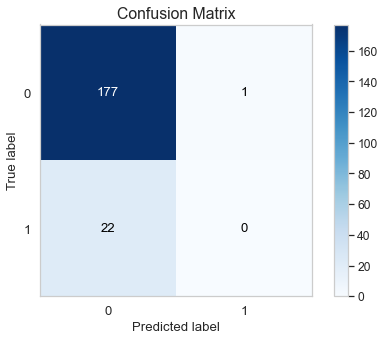

In [92]:
skplt.metrics.plot_confusion_matrix(y_val, y_pred)

In [93]:
print(classification_report(y_val,y_pred))
print('ROC-AUC:',round(roc_auc_score(y_val,y_pred),4))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       178
           1       0.00      0.00      0.00        22

    accuracy                           0.89       200
   macro avg       0.44      0.50      0.47       200
weighted avg       0.79      0.89      0.84       200

ROC-AUC: 0.4972


Once the classes are unbalanced, we are going to use Stratified K Fold, as we don't want any folds to have only 1 particular class or even 1 class dominating the other one as it may create a bias in that particular fold. Stratification makes sure that the percentage of samples for each class is similar across folds.

In [94]:
# Create a StratifiedKFold instance with 10 splits, to be used in cross validation and (later on GridSearch)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=15)
acc = cross_val_score(log_model, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
recall = cross_val_score(log_model, X_train, y_train, cv=cv, scoring='recall', n_jobs=-1)
precision = cross_val_score(log_model, X_train, y_train, cv=cv, scoring='average_precision', n_jobs=-1)
f1_score =  cross_val_score(log_model, X_train, y_train, cv=cv, scoring='f1', n_jobs=-1)
roc_auc =  cross_val_score(log_model, X_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1)
print("Accuracy: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (recall.mean(), recall.std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (precision.mean(), precision.std() * 2))
print("F1-Score: %0.2f (+/- %0.2f)" % (f1_score.mean(), f1_score.std() * 2))
print("ROC_AUC: %0.2f (+/- %0.2f)" % (roc_auc.mean(), roc_auc.std() * 2))

Accuracy: 0.89 (+/- 0.04)
Recall: 0.04 (+/- 0.18)
Precision: 0.47 (+/- 0.35)
F1-Score: 0.07 (+/- 0.29)
ROC_AUC: 0.82 (+/- 0.16)


It is clearly seen that the accuracy is high, around 0.89, but the F1 score is lower due to a lower recall. There is room for the model to be finetuned and strive for better performance, and one of the methods is Grid Search.

### 6.2.2  - Hyperparameters Tuning

**- Hyperparameter Tuning Implementation**

It is noticeable that Accuracy is not sufficient for this unbalanced dataset. If we finetune the model purely by accuracy, then it would favor toward predicting the loan as “good loan”. F1 score is the harmonic mean between precision and recall, and the best metric to use in order to tune the model on an unbalanced data.

In [95]:
grid = {'penalty' : ['l1', 'l2'],
        'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'solver': ['liblinear'],
        'class_weight' : ['None', 'balanced']}

model = LogisticRegression()
# Grid Search Implementation
clf = GridSearchCV(estimator = model, param_grid=grid, cv=cv, scoring= 'f1', n_jobs=-1)

# Fit the model
clf.fit(X_train, y_train)

clf.best_params_

{'C': 1000, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}

In [96]:
clf_results = pd.concat([pd.DataFrame(clf.cv_results_["params"]), 
                         pd.DataFrame(clf.cv_results_["mean_test_score"], 
                                      columns=["F1 Score"])],axis=1)

# Sort the values according to the accuracy
clf_results.sort_values(by = ["F1 Score"], ascending = False).head(5) 

,C,class_weight,penalty,solver,F1 Score
27,1000.0,balanced,l2,liblinear,0.401299
14,1.0,balanced,l1,liblinear,0.400068
15,1.0,balanced,l2,liblinear,0.400068
18,10.0,balanced,l1,liblinear,0.399297
22,100.0,balanced,l1,liblinear,0.397759


- **Apply the best combination of parameters to our model**

In [124]:
LR_best_parameters = LogisticRegression(C = 1000,
                                        class_weight = 'balanced',
                                        penalty =  'l2',
                                        solver = 'liblinear').fit(X_train, y_train)

### 6.2.3  - Model Evaluation

 - **Predict on the valiation set**

In [96]:
y_pred = LR_best_parameters.predict(X_val)

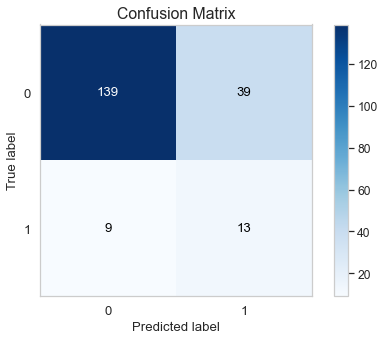

In [97]:
skplt.metrics.plot_confusion_matrix(y_val, y_pred)

In [98]:
print(classification_report(y_val,y_pred))
print('ROC-AUC:',round(roc_auc_score(y_val,y_pred),4))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85       178
           1       0.25      0.59      0.35        22

    accuracy                           0.76       200
   macro avg       0.59      0.69      0.60       200
weighted avg       0.86      0.76      0.80       200

ROC-AUC: 0.6859


 - **Predict on the test set**

In [99]:
y_pred = LR_best_parameters.predict(X_test)

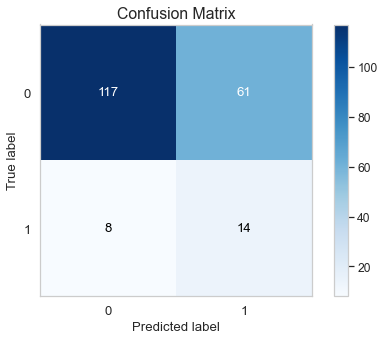

In [100]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

In [101]:
print(classification_report(y_test,y_pred))
print('ROC-AUC:',round(roc_auc_score(y_test,y_pred),4))

              precision    recall  f1-score   support

           0       0.94      0.66      0.77       178
           1       0.19      0.64      0.29        22

    accuracy                           0.66       200
   macro avg       0.56      0.65      0.53       200
weighted avg       0.85      0.66      0.72       200

ROC-AUC: 0.6468


<a  id="#dt">

## 6.3. Decision Tree

</a>

### 6.3.1  - Model

In [102]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [103]:
y_pred = dt_model.predict(X_val)

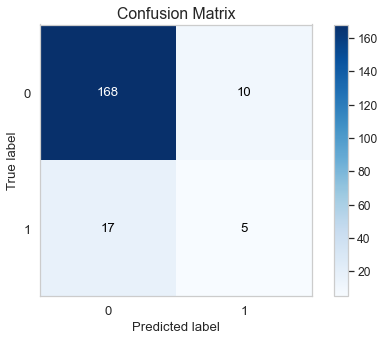

In [104]:
skplt.metrics.plot_confusion_matrix(y_val, y_pred)

In [105]:
print(classification_report(y_val,y_pred))
print('ROC-AUC:',round(roc_auc_score(y_val,y_pred),4))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       178
           1       0.33      0.23      0.27        22

    accuracy                           0.86       200
   macro avg       0.62      0.59      0.60       200
weighted avg       0.84      0.86      0.85       200

ROC-AUC: 0.5855


In [106]:
# Create a StratifiedKFold instance with 10 splits, to be used in cross validation and (later on GridSearch)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=15)
acc = cross_val_score(dt_model, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
recall = cross_val_score(dt_model, X_train, y_train, cv=cv, scoring='recall', n_jobs=-1)
precision = cross_val_score(dt_model, X_train, y_train, cv=cv, scoring='average_precision', n_jobs=-1)
f1_score =  cross_val_score(dt_model, X_train, y_train, cv=cv, scoring='f1', n_jobs=-1)
roc_auc =  cross_val_score(dt_model, X_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1)
print("Accuracy: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (recall.mean(), recall.std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (precision.mean(), precision.std() * 2))
print("F1-Score: %0.2f (+/- %0.2f)" % (f1_score.mean(), f1_score.std() * 2))
print("ROC_AUC: %0.2f (+/- %0.2f)" % (roc_auc.mean(), roc_auc.std() * 2))

Accuracy: 0.87 (+/- 0.08)
Recall: 0.42 (+/- 0.29)
Precision: 0.24 (+/- 0.17)
F1-Score: 0.31 (+/- 0.34)
ROC_AUC: 0.63 (+/- 0.17)


### 6.3.2  - Hyperparameters Tuning

In [125]:
parameter_space = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 2],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,200,500],
    'min_weight_fraction_leaf': [0.0, 0.15],
    'max_features': [None, 2, 0.5, 'auto', 'log2'],
    'max_leaf_nodes': [None, 5, 10],
    'min_impurity_decrease': [0.0, 0.02, 0.05]    
}

model = DecisionTreeClassifier()

# Grid Search Implementation
clf = GridSearchCV(estimator = model, param_grid=parameter_space, cv=cv, scoring= 'f1', n_jobs=-1)

# Fit the model
clf.fit(X_train, y_train)

clf.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'splitter': 'best'}

In [126]:
clf_results = pd.concat([pd.DataFrame(clf.cv_results_["params"]), 
                         pd.DataFrame(clf.cv_results_["mean_test_score"], 
                                      columns=["F1 Score"])],axis=1)

# Sort the values according to the accuracy
clf_results.sort_values(by = ["F1 Score"], ascending = False).head(5) 

,criterion,max_depth,max_features,max_leaf_nodes,min_impurity_decrease,min_samples_leaf,min_samples_split,min_weight_fraction_leaf,splitter,F1 Score
8,gini,NaN,None,NaN,0.0,1,10,0.0,best,0.399441
4,gini,NaN,None,NaN,0.0,1,5,0.0,best,0.390572
0,gini,NaN,None,NaN,0.0,1,2,0.0,best,0.383723
1296,gini,NaN,log2,NaN,0.0,1,2,0.0,best,0.382550
4213,entropy,NaN,auto,NaN,0.0,1,2,0.0,random,0.357621


In [125]:
DT_best_parameters = DecisionTreeClassifier(criterion = 'gini',
                                            max_depth = None,
                                            max_features = None,
                                            max_leaf_nodes = None,
                                            min_impurity_decrease = 0.0,
                                            min_samples_leaf = 1,
                                            min_samples_split = 10,
                                            min_weight_fraction_leaf = 0.0,
                                            splitter = 'best').fit(X_train, y_train)

### 6.3.3  - Model Evaluation

 - **Predict on the valiation set**

In [128]:
y_pred = DT_best_parameters.predict(X_val)

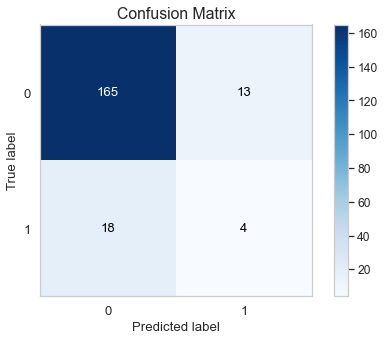

In [129]:
skplt.metrics.plot_confusion_matrix(y_val, y_pred)

In [130]:
print(classification_report(y_val,y_pred))
print('ROC-AUC:',round(roc_auc_score(y_val,y_pred),4))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       178
           1       0.24      0.18      0.21        22

    accuracy                           0.84       200
   macro avg       0.57      0.55      0.56       200
weighted avg       0.83      0.84      0.84       200

ROC-AUC: 0.5544


 - **Predict on the test set**

In [131]:
y_pred = DT_best_parameters.predict(X_test)

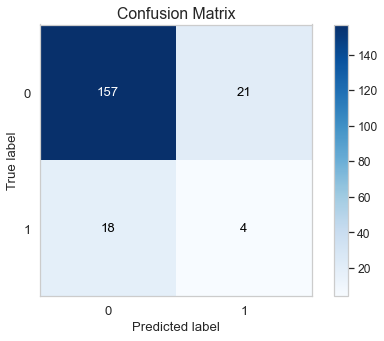

In [132]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

In [133]:
print(classification_report(y_test,y_pred))
print('ROC-AUC:',round(roc_auc_score(y_test,y_pred),4))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       178
           1       0.16      0.18      0.17        22

    accuracy                           0.81       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.82      0.81      0.81       200

ROC-AUC: 0.5319


<a  id="#rf">

## 6.4. Random Forest

</a>

### 6.4.1  - Model

In [90]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [91]:
y_pred = rf_model.predict(X_val)

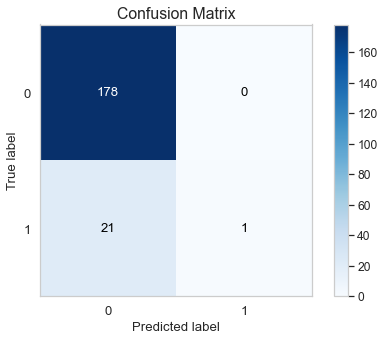

In [92]:
skplt.metrics.plot_confusion_matrix(y_val, y_pred)

In [93]:
print(classification_report(y_val,y_pred))
print('ROC-AUC:',round(roc_auc_score(y_val,y_pred),4))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       178
           1       1.00      0.05      0.09        22

    accuracy                           0.90       200
   macro avg       0.95      0.52      0.52       200
weighted avg       0.91      0.90      0.85       200

ROC-AUC: 0.5227


In [94]:
# Create a StratifiedKFold instance with 10 splits, to be used in cross validation and (later on GridSearch)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=15)
acc = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
recall = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='recall', n_jobs=-1)
precision = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='average_precision', n_jobs=-1)
f1_score =  cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='f1', n_jobs=-1)
roc_auc =  cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1)
print("Accuracy: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (recall.mean(), recall.std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (precision.mean(), precision.std() * 2))
print("F1-Score: %0.2f (+/- %0.2f)" % (f1_score.mean(), f1_score.std() * 2))
print("ROC_AUC: %0.2f (+/- %0.2f)" % (roc_auc.mean(), roc_auc.std() * 2))

Accuracy: 0.89 (+/- 0.03)
Recall: 0.16 (+/- 0.25)
Precision: 0.45 (+/- 0.32)
F1-Score: 0.21 (+/- 0.30)
ROC_AUC: 0.83 (+/- 0.15)


### 6.4.2  - Hyperparameters Tuning

In [95]:
parameter_space = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'n_estimators': [25, 50, 100, 200, 300, 1000]  
}

model = RandomForestClassifier()

# Grid Search Implementation
clf = GridSearchCV(estimator = model, param_grid=parameter_space, cv=cv, scoring= 'f1', n_jobs=-1)

# Fit the model
clf.fit(X_train, y_train)

clf.best_params_

{'bootstrap': True, 'max_depth': 100, 'n_estimators': 100}

In [96]:
clf_results = pd.concat([pd.DataFrame(clf.cv_results_["params"]), 
                         pd.DataFrame(clf.cv_results_["mean_test_score"], 
                                      columns=["F1 Score"])],axis=1)

# Sort the values according to the accuracy
clf_results.sort_values(by = ["F1 Score"], ascending = False).head(5) 

,bootstrap,max_depth,n_estimators,F1 Score
14,True,100,100,0.240794
9,True,90,200,0.239603
20,True,110,100,0.220339
16,True,100,300,0.215794
17,True,100,1000,0.213810


In [97]:
RF_best_parameters = RandomForestClassifier(bootstrap = True,
                                            max_depth = 100,
                                            n_estimators = 100).fit(X_train, y_train)

### 6.4.3  - Model Evaluation

 - **Predict on the valiation set**

In [98]:
y_pred = RF_best_parameters.predict(X_val)

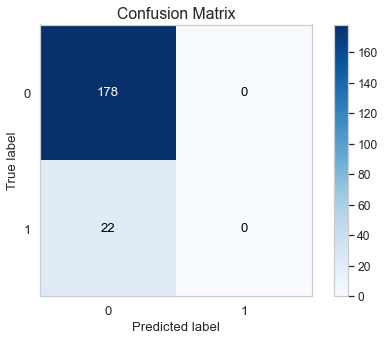

In [99]:
skplt.metrics.plot_confusion_matrix(y_val, y_pred)

In [101]:
print(classification_report(y_val,y_pred))
print('ROC-AUC:',round(roc_auc_score(y_val,y_pred),4))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       178
           1       0.00      0.00      0.00        22

    accuracy                           0.89       200
   macro avg       0.45      0.50      0.47       200
weighted avg       0.79      0.89      0.84       200

ROC-AUC: 0.5


 - **Predict on the test set**

In [102]:
y_pred = RF_best_parameters.predict(X_test)

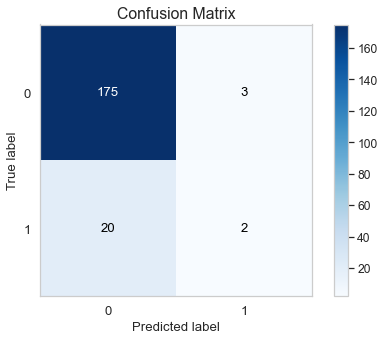

In [103]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

In [104]:
print(classification_report(y_test,y_pred))
print('ROC-AUC:',round(roc_auc_score(y_test,y_pred),4))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       178
           1       0.40      0.09      0.15        22

    accuracy                           0.89       200
   macro avg       0.65      0.54      0.54       200
weighted avg       0.84      0.89      0.85       200

ROC-AUC: 0.537


<a  id="#nn">

## 6.5. Neural Networks

</a>

### 6.5.1  - Model

In [105]:
nn_model = MLPClassifier()
nn_model.fit(X_train,y_train)

MLPClassifier()

In [106]:
y_pred = nn_model.predict(X_val)

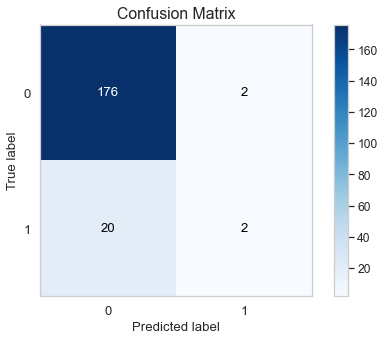

In [107]:
skplt.metrics.plot_confusion_matrix(y_val, y_pred)

In [108]:
print(classification_report(y_val,y_pred))
print('ROC-AUC:',round(roc_auc_score(y_val,y_pred),4))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       178
           1       0.50      0.09      0.15        22

    accuracy                           0.89       200
   macro avg       0.70      0.54      0.55       200
weighted avg       0.85      0.89      0.85       200

ROC-AUC: 0.5398


In [109]:
# Create a StratifiedKFold instance with 10 splits, to be used in cross validation and (later on GridSearch)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=15)
acc = cross_val_score(nn_model, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
recall = cross_val_score(nn_model, X_train, y_train, cv=cv, scoring='recall', n_jobs=-1)
precision = cross_val_score(nn_model, X_train, y_train, cv=cv, scoring='average_precision', n_jobs=-1)
f1_score =  cross_val_score(nn_model, X_train, y_train, cv=cv, scoring='f1', n_jobs=-1)
roc_auc =  cross_val_score(nn_model, X_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1)
print("Accuracy: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (recall.mean(), recall.std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (precision.mean(), precision.std() * 2))
print("F1-Score: %0.2f (+/- %0.2f)" % (f1_score.mean(), f1_score.std() * 2))
print("ROC_AUC: %0.2f (+/- %0.2f)" % (roc_auc.mean(), roc_auc.std() * 2))

Accuracy: 0.85 (+/- 0.11)
Recall: 0.26 (+/- 0.41)
Precision: 0.18 (+/- 0.07)
F1-Score: 0.19 (+/- 0.30)
ROC_AUC: 0.70 (+/- 0.25)


### 6.5.2  - Hyperparameters Tuning

In [110]:
#Define a dictionary named as grid and define some architectures that will be considered during modelling
parameter_space = {'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50), (100), (14,14,16)],
        'activation': ['relu', 'logistic','tanh', 'dentity’'],
        'solver': ['sgd', 'adam', 'lbfgs’'],
        'learning_rate_init': [0.01, 0.001, 0.0001],
        'learning_rate': ['constant','adaptive', 'invscaling’']}

model = MLPClassifier()

# Grid Search Implementation
clf = GridSearchCV(estimator = model, param_grid=parameter_space, cv=cv, scoring= 'f1', n_jobs=-1)

# Fit the model
clf.fit(X_train, y_train)

clf.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': 100,
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'solver': 'adam'}

In [111]:
clf_results = pd.concat([pd.DataFrame(clf.cv_results_["params"]), 
                         pd.DataFrame(clf.cv_results_["mean_test_score"], 
                                      columns=["F1 Score"])],axis=1)

# Sort the values according to the accuracy
clf_results.sort_values(by = ["F1 Score"], ascending = False).head(5) 

,activation,hidden_layer_sizes,learning_rate,learning_rate_init,solver,F1 Score
58,relu,100,constant,0.0010,adam,0.236461
10,relu,"(50, 50, 50)",adaptive,0.0100,adam,0.235231
34,relu,"(50, 100, 50)",constant,0.0001,adam,0.222531
7,relu,"(50, 50, 50)",constant,0.0001,adam,0.215875
82,relu,"(14, 14, 16)",constant,0.0100,adam,0.198490


In [112]:
NN_best_parameters = MLPClassifier(activation = 'relu',
                                   hidden_layer_sizes = 100,
                                   learning_rate = 'constant',
                                   learning_rate_init = 0.0010,
                                   solver = 'adam').fit(X_train, y_train)

 - **Predict on the valiation set**

In [113]:
y_pred = NN_best_parameters.predict(X_val)

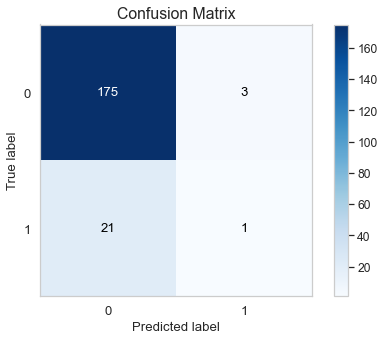

In [114]:
skplt.metrics.plot_confusion_matrix(y_val, y_pred)

In [115]:
print(classification_report(y_val,y_pred))
print('ROC-AUC:',round(roc_auc_score(y_val,y_pred),4))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94       178
           1       0.25      0.05      0.08        22

    accuracy                           0.88       200
   macro avg       0.57      0.51      0.51       200
weighted avg       0.82      0.88      0.84       200

ROC-AUC: 0.5143


### 6.5.3  - Model Evaluation

 - **Predict on the test set**

In [116]:
y_pred = NN_best_parameters.predict(X_test)

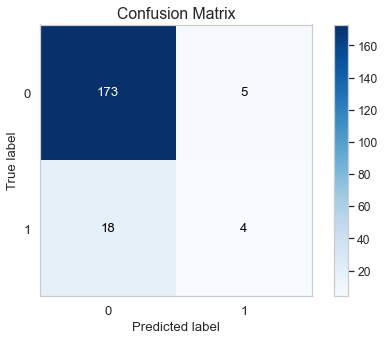

In [117]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

In [118]:
print(classification_report(y_test,y_pred))
print('ROC-AUC:',round(roc_auc_score(y_test,y_pred),4))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       178
           1       0.44      0.18      0.26        22

    accuracy                           0.89       200
   macro avg       0.68      0.58      0.60       200
weighted avg       0.86      0.89      0.86       200

ROC-AUC: 0.5769


<hr>
<a class="anchor" id="#results">
    
# 7. Final Results
    
</a>

#### - Plot the ROC Curve for all the models

In [119]:
def evaluate_model(*models):
    # Instantiate the classfiers and make a list
    classifiers = models
    #classifiers.append(models)

    # Define a result table as a DataFrame
    result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc', 'youden', 'harmonic', 'threshold_y', 'threshold_h'])

    # Train the models and record the results
    for cls in classifiers:
        model = cls.fit(X_train, y_train)
        yproba = model.predict_proba(X_test)[::,1]

        fpr, tpr, thresholds = roc_curve(y_test,  yproba)
        auc = roc_auc_score(y_test, yproba)
        youden = tpr + fpr
        harmonic = 2*tpr*(1-fpr)/(tpr + (1-fpr))
        threshold_y = thresholds[np.nanargmax(youden)]
        threshold_h = thresholds[np.nanargmax(harmonic)]
        result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                            'fpr':fpr, 
                                            'tpr':tpr, 
                                            'auc':auc,
                                            'youden': np.nanmax(youden),
                                            'harmonic': np.nanmax(harmonic),
                                            'threshold_y': threshold_y,
                                            'threshold_h':threshold_h}, ignore_index=True)

    # Set name of the classifiers as index labels
    result_table.set_index('classifiers', inplace=True)

    fig = plt.figure(figsize=(10,8))

    for i in result_table.index:
        plt.plot(result_table.loc[i]['fpr'], 
                 result_table.loc[i]['tpr'], 
                 label="{}".format(i))

    plt.plot([0,1], [0,1], color='orange', linestyle='--')

    plt.xticks(np.arange(0.0, 1.1, step=0.1))
    plt.xlabel("False Positive Rate", fontsize=15)

    plt.yticks(np.arange(0.0, 1.1, step=0.1))
    plt.ylabel("True Positive Rate", fontsize=15)

    plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
    plt.legend(prop={'size':13}, loc='lower right')
    
    #print(result_table)

    plt.show()

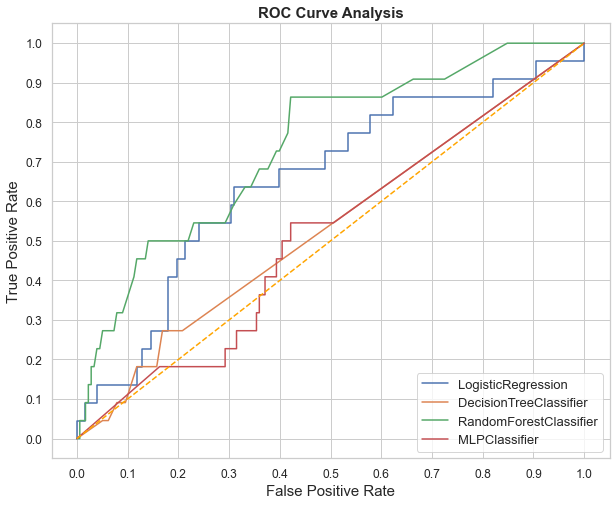

In [120]:
evaluate_model(LogisticRegression(C = 1000,
                                    class_weight = 'balanced',
                                    penalty =  'l2',
                                    solver = 'liblinear'), 
              DecisionTreeClassifier(criterion = 'gini',
                                            max_depth = None,
                                            max_features = None,
                                            max_leaf_nodes = None,
                                            min_impurity_decrease = 0.0,
                                            min_samples_leaf = 1,
                                            min_samples_split = 10,
                                            min_weight_fraction_leaf = 0.0,
                                            splitter = 'best'),
            RandomForestClassifier(bootstrap = True,
                                            max_depth = 100,
                                            n_estimators = 100),
              MLPClassifier(activation = 'relu',
                                   hidden_layer_sizes = 100,
                                   learning_rate = 'constant',
                                   learning_rate_init = 0.0010,
                                   solver = 'adam'))

#### - Check all the metrics for all the models in the Validation Dataset

In [127]:
def all_metrics(X_df, y_df):
    raw_data = {'Accuracy': [accuracy_score(y_df, LR_best_parameters.predict(X_df)), accuracy_score(y_df, DT_best_parameters.predict(X_df)), accuracy_score(y_df, RF_best_parameters.predict(X_df)), accuracy_score(y_df, NN_best_parameters.predict(X_df))],
                'Precision': [precision_score(y_df, LR_best_parameters.predict(X_df)), precision_score(y_df, DT_best_parameters.predict(X_df)), precision_score(y_df, RF_best_parameters.predict(X_df)), precision_score(y_df, NN_best_parameters.predict(X_df))],
                'Recall': [recall_score(y_df, LR_best_parameters.predict(X_df)), recall_score(y_df, DT_best_parameters.predict(X_df)), recall_score(y_df, RF_best_parameters.predict(X_df)), recall_score(y_df, NN_best_parameters.predict(X_df))],
                #'F1 Score': [f1_score(y_df, LR_best_parameters.predict(X_df)), f1_score(y_df, DT_best_parameters.predict(X_df)), f1_score(y_df, RF_best_parameters.predict(X_df)), f1_score(y_df, NN_best_parameters.predict(X_df))],
                'ROC-AUC': [roc_auc_score(y_df, LR_best_parameters.predict(X_df)), roc_auc_score(y_df, DT_best_parameters.predict(X_df)), roc_auc_score(y_df, RF_best_parameters.predict(X_df)), roc_auc_score(y_df, NN_best_parameters.predict(X_df))]
                }

    metrics = pd.DataFrame(list(raw_data.values()), index=raw_data.keys(),columns=['Logistic Regression','Decision Tree', 'Random Forest', 'Neural Networks'])
    
    return metrics

In [128]:
all_metrics(X_val, y_val)

,Logistic Regression,Decision Tree,Random Forest,Neural Networks
Accuracy,0.760000,0.855000,0.89,0.880000
Precision,0.250000,0.294118,0.00,0.250000
Recall,0.590909,0.227273,0.00,0.045455
ROC-AUC,0.685904,0.579928,0.50,0.514300


#### - Check all the metrics for all the models in the Test Dataset

In [129]:
all_metrics(X_test, y_test)

,Logistic Regression,Decision Tree,Random Forest,Neural Networks
Accuracy,0.655000,0.800000,0.885000,0.885000
Precision,0.186667,0.153846,0.400000,0.444444
Recall,0.636364,0.181818,0.090909,0.181818
ROC-AUC,0.646834,0.529111,0.537028,0.576864
